<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            We have many high performance models which is providing satisfactory Recall value of the test dataset. Amongst them following models gave best results:<br>
        <ul>
            <li> Light GBM with SMOTEENN and Hyperparameter tuning</li>
            <li> Logistic Regression with PCA & SMOTEENN </li>
            <li> Logistic Regression with PCA, SMOTEENN & L2 Regularization </li> 
            <li> SVM with SMOTEENN </li> 
        </ul>
        As Logistic Regression models are with PCA, we loose the interpretability of the features which impacts most in customer churn decision. We will use <b>Light GBM with SMOTEENN</b> as out final model to find feature importance. 
    </span>    
</div>

<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h1>

<h3>   
      <font color = darkgreen>
            <span style='font-family:Georgia'>
            Business Problem Overview :
            </span>   
        </font>    
</h3>
<div>
    <span style='font-family:Georgia'>
        In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, <b>customer retention</b> has now become even more important than customer acquisition.<br>
        For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>
        In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
    </span>
</div>
<hr>
<h3>   
      <font color = darkgreen>
            <span style='font-family:Georgia'>
            Understanding & Defining Churn :
            </span>   
        </font>    
</h3>
<div>
    <span style='font-family:Georgia'>
        There are two main models of payment in the telecom industry - <b>Postpaid</b> (customers pay a monthly/annual bill after using the services) and <b>Prepaid</b> (customers pay/recharge with a certain amount in advance and then use the services).<br>
        In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and we directly know that this is an instance of churn.<br>
        However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).<br>
        Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.This project is based on the Indian and Southeast Asian market.
    </span>
</div>
<hr>
<h3>   
      <font color = darkgreen>
            <span style='font-family:Georgia'>
            Definitions of Churn :
            </span>   
        </font>    
</h3>
<div>
    <span style='font-family:Georgia'>
        There are various ways to define churn, such as:<br>
        <ol>
            <li><b><font color = 'blue'>Revenue-based churn:</font></b> Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.<br><br>
                The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.</li><br>
            <li><b><font color = 'blue'>Usage-based churn:</font></b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.<br><br>
                A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.</li>
        </ol>
        In this project, we will use the usage-based definition to define churn.
    </span>
</div>
<hr>
<h3>   
      <font color = darkgreen>
            <span style='font-family:Georgia'>
            High Value Churn :
            </span>   
        </font>    
</h3>
<div>
    <span style='font-family:Georgia'>
        In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.<br>
        In this project, we will define high-value customers based on a certain metric and predict churn only on high-value customers.
    </span>
</div>

<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Goal
            </span>   
        </font>    
</h2>

<h3>   
      <font color = darkgreen>
            <span style='font-family:Georgia'>
            Understanding the Business Objective & Data :
            </span>   
        </font>    
</h3>
<div>
    <span style='font-family:Georgia'>
        The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
    </span>
</div>
<hr>
<h3>   
      <font color = darkgreen>
            <span style='font-family:Georgia'>
            Understanding Customer Behavior during Churn :
            </span>   
        </font>    
</h3>
<div>
    <span style='font-family:Georgia'>
        Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :<br>
        <ul>
            <li><b><font color = 'blue'>The ‘good’ phase: </font></b> In this phase, the customer is happy with the service and behaves as usual.</li>
            <li><b><font color = 'blue'>The ‘action’ phase:</font></b> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)</li>
            <li><b><font color = 'blue'>The ‘churn’ phase:</font></b> In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.</li>
        </ul>
        In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.
    </span>
</div>

<a id="libraries"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Python Libraries:
            </span>   
        </font>    
</h1>

<H5> Suppress Warnings: </H5>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<h5> Import Python Libraries: </h5>

In [2]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter
from math import sqrt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Machine Learning Libraries
import statsmodels.api as sm

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Data Imbalance Treatment Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

<h5> Setting up Jupyter View </h5>

In [3]:
# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<a id="import"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h1>

<h5> Importing the Input file </h5>

In [4]:
#importing the dataset
telecom = pd.read_csv("telecom_churn_data.csv")

#checking the top 5 rows
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#checking the bottom 5 rows
telecom.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

<h5> Inspect Dataframe </h5>

In [6]:
#database dimension
print("Database dimension     :",telecom.shape)
print("Database size          :",telecom.size)
print("Number of Row          :",len(telecom.index))
print("Number of Columns      :",len(telecom.columns))

Database dimension     : (99999, 226)
Database size          : 22599774
Number of Row          : 99999
Number of Columns      : 226


In [7]:
#checking numerical columns statistics
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
#info about the column types etc. 
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         The data types of the columns are float, integer and object type. We have 179 columns with float values, 35 columns with integer values and 12 columns with Object Values. Some of the columns are actually Date, they need to be converted to Date Type format. We can see there are some null values in the column. Let's inspect the null values first 
    </span>    
</div>

<h5> Duplicate Analysis </h5>

In [9]:
print("Total number of duplicate values of mobile numbers :" , telecom.duplicated(subset = 'mobile_number').sum())

Total number of duplicate values of mobile numbers : 0


In [10]:
# Creating a copy of original dataframe for duplicate check
telecom_dup = telecom

# Checking for duplicates and dropping the entire duplicate row if any
telecom_dup.drop_duplicates(subset=None, inplace=True)
print ("Original Dataframe Shape                      : ", telecom.shape)
print ("Shape of Dataframe after removing duplicates  : ", telecom_dup.shape)

Original Dataframe Shape                      :  (99999, 226)
Shape of Dataframe after removing duplicates  :  (99999, 226)


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         All Mobile number data are unique and there are no duplicate values.
    </span>    
</div>

<a id="dataclean"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning
            </span>   
        </font>    
</h1>

<h5> Null Value Calculation </h5>

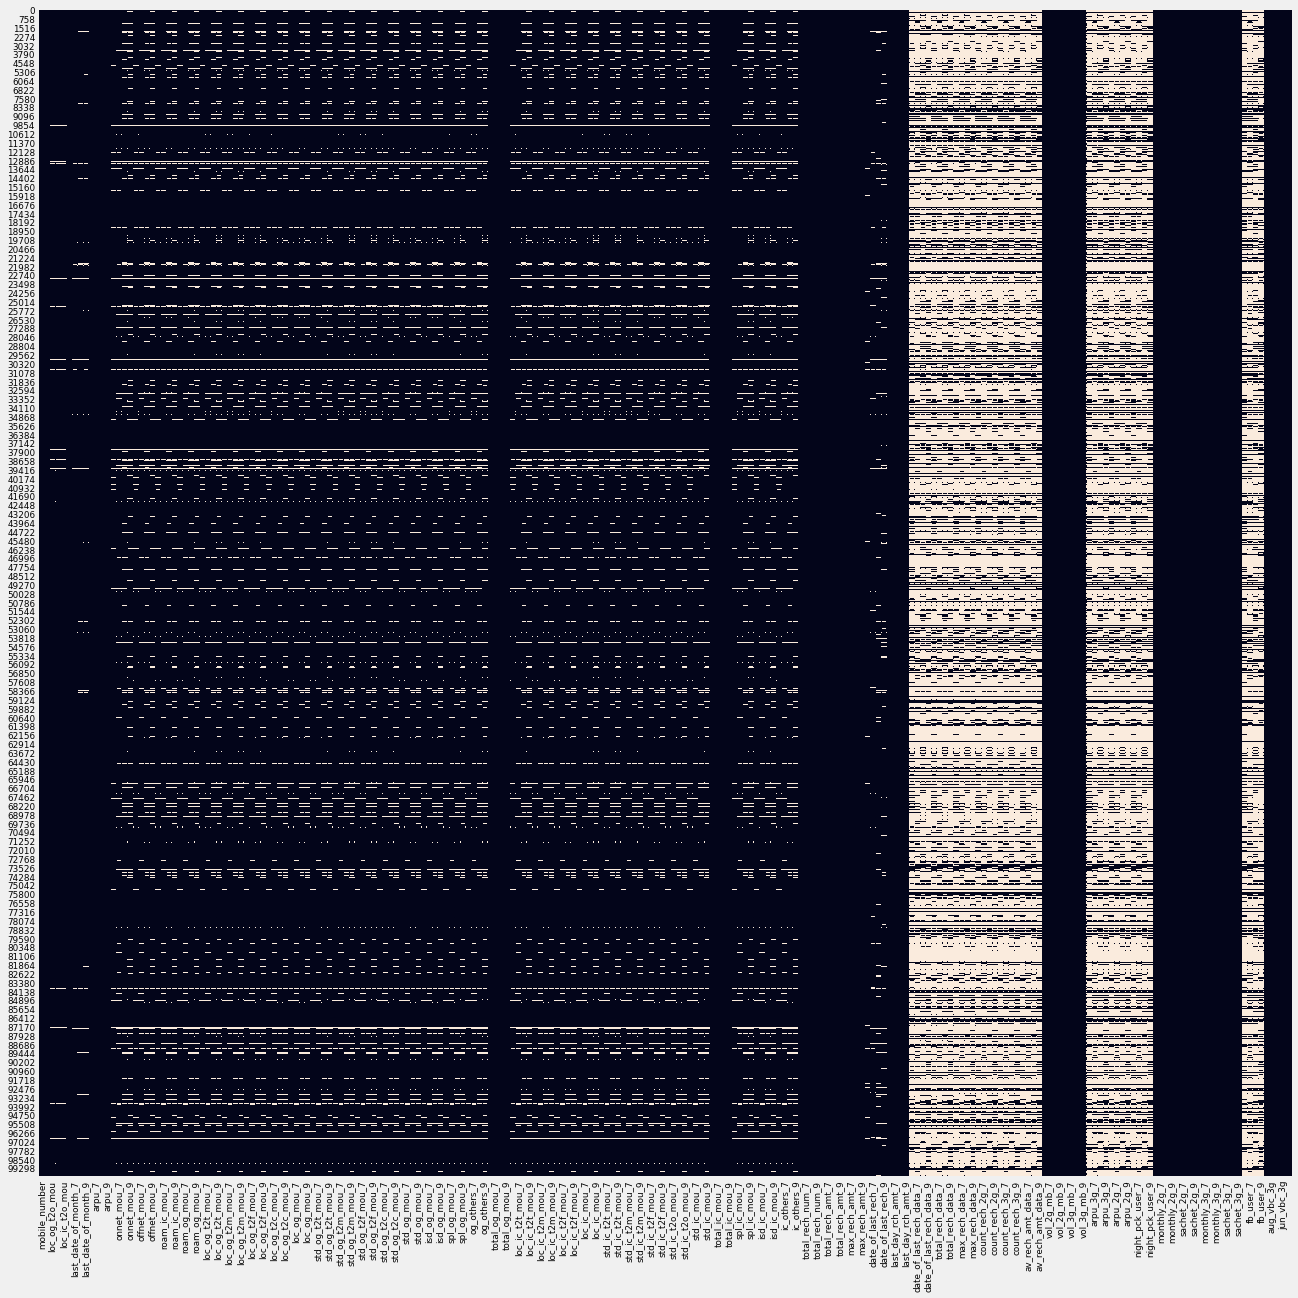

In [11]:
# Plotting the dataframe to check null values and its distribution
plt.figure(figsize = (20,20))
sns.heatmap(telecom.isnull(),cbar = False)
plt.show()

In [11]:
# Function to check column wise null values and % of null values
def null_calc(df):
    #Column wise null values in train data set 
    null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
    null_perc.columns = ['Column Name', 'Null Values Percentage']
    null_value = pd.DataFrame(df.isnull().sum()).reset_index()
    null_value.columns = ['Column Name', 'Null Values']
    null_df = pd.merge(null_value, null_perc, on='Column Name')
    null_df['Null Values Percentage'] = pd.to_numeric(null_df['Null Values Percentage'], errors='coerce')
    null_df = null_df.loc[null_df['Null Values Percentage'] > 0.00] # Keeping only null columns info
    null_df.sort_values("Null Values", ascending = False, inplace=True, ignore_index=True)
    return null_df

In [12]:
# Checking the null values of the telecom dataframe
null_telecom = null_calc(telecom)
null_telecom

Column Name  Null Values  Null Values Percentage
0             count_rech_2g_6        74846                   74.85
1             max_rech_data_6        74846                   74.85
2                   arpu_3g_6        74846                   74.85
3          av_rech_amt_data_6        74846                   74.85
4             count_rech_3g_6        74846                   74.85
5            night_pck_user_6        74846                   74.85
6                   arpu_2g_6        74846                   74.85
7                   fb_user_6        74846                   74.85
8           total_rech_data_6        74846                   74.85
9    date_of_last_rech_data_6        74846                   74.85
10            count_rech_3g_7        74428                   74.43
11                  arpu_3g_7        74428                   74.43
12         av_rech_amt_data_7        74428                   74.43
13                  fb_user_7        74428                   74.43
14          total_rech_data_7        74428                   74.43
15            count_rech_2g_7        74428                   74.43
16                  arpu_2g_7        74428                   74.43
17           night_pck_user_7        74428                   74.43
18            max_rech_data_7        74428                   74.43
19   date_of_last_rech_data_7        74428                   74.43
20   date_of_last_rech_data_9        74077                   74.08
21            count_rech_2g_9        74077                   74.08
22          total_rech_data_9        74077                   74.08
23            count_rech_3g_9        74077                   74.08
24            max_rech_data_9        74077                   74.08
25         av_rech_amt_data_9        74077                   74.08
26                  arpu_3g_9        74077                   74.08
27                  fb_user_9        74077                   74.08
28           night_pck_user_9        74077                   74.08
29                  arpu_2g_9        74077                   74.08
30         av_rech_amt_data_8        73660                   73.66
31                  fb_user_8        73660                   73.66
32           night_pck_user_8        73660                   73.66
33            count_rech_2g_8        73660                   73.66
34            count_rech_3g_8        73660                   73.66
35            max_rech_data_8        73660                   73.66
36   date_of_last_rech_data_8        73660                   73.66
37          total_rech_data_8        73660                   73.66
38                  arpu_3g_8        73660                   73.66
39                  arpu_2g_8        73660                   73.66
40              roam_og_mou_9         7745                    7.75
41           std_og_t2c_mou_9         7745                    7.75
42           std_ic_t2f_mou_9         7745                    7.75
43           std_ic_t2m_mou_9         7745                    7.75
44               loc_ic_mou_9         7745                    7.75
45               std_og_mou_9         7745                    7.75
46                og_others_9         7745                    7.75
47           std_ic_t2o_mou_9         7745                    7.75
48               isd_og_mou_9         7745                    7.75
49               offnet_mou_9         7745                    7.75
50               spl_og_mou_9         7745                    7.75
51           std_og_t2f_mou_9         7745                    7.75
52           std_og_t2m_mou_9         7745                    7.75
53           loc_ic_t2t_mou_9         7745                    7.75
54               std_ic_mou_9         7745                    7.75
55           loc_og_t2f_mou_9         7745                    7.75
56                ic_others_9         7745                    7.75
57           loc_og_t2t_mou_9         7745                    7.75
58           loc_ic_t2m_mou_9         7745                    7.7

In [13]:
# How many columns have null values ? 
print("Total number of columns which have null values are :", null_telecom.shape[0])

# How many columns have more than 70% null values?
print("Total number of columns which have null values more than 70% :", len(null_telecom[null_telecom['Null Values Percentage']>70]))

Total number of columns which have null values are : 166
Total number of columns which have null values more than 70% : 40


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy:</b><br>
        <ul>
            <li>There are 40 columns which have more than 70% null values. Ideally we can remove these columns from calculation as imputing values with such high null values will not result in accurate predictor values. But, we need to first analyze the types of columns that have more than 70% null values.</li>
            <li>Some of the columns like night_pack_X or fb_user_X (where X signified the month value 6/7/8/9) have high null values. In these cases, we can consider that the particular customer did not take those packages or they did not opt for social media utilities. For such columns, we can impute null values with 0.</li>
            <li>We also have to calculate the <b> High Value Customer </b> where as High value customers can be considered as those who have <b>recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months</b>, which signifies the good phase.</li> 
        </ul>
    </span>
    <br>
    <span style='font-family:Georgia'>
        Thus, we have to first treat the columns related to recharge amount to identify high value customer. <br>
        <ul>
            <li>total_rech_data_6        - 74.85 % missing values </li>
            <li>total_rech_data_7        - 74.43 % missing values </li>
            <li>av_rech_amt_data_6       - 74.85 % missing values </li>
            <li>av_rech_amt_data_7       - 74.43 % missing values </li>
            <li>date_of_last_rech_data_6 - 74.85 % missing values </li>
            <li>date_of_last_rech_data_7 - 74.43 % missing values </li>
        </ul>
    </span>
</div>

<h5> Null Value Imputation </h5>

In [14]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of June
if telecom['total_rech_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull()):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         So we see that the two indexes are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.es.
    </span>    
</div>

In [15]:
# Imputing the data for total_rech_data_6 and av_rech_amt_data_6 as 0
telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
         We can follow the same method for confirmation and data imputation for month 7th and 8th. 
    </span>    
</div>

In [16]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of July(7)
if telecom['total_rech_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull()):
    print('The indexes for NULL values for month 7 are equal')

# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of August(8)
if telecom['total_rech_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull()):
    print('The indexes for NULL values for month 8 are equal') 

The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


<div>
    <span style='font-family:Georgia'>
        So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for month 7 and 8 & the missing values can be imputed with 0.<br><br>Also as the total data recharge for the month is 0, we can impute 0 for each of 'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8' columns as well.
    </span>
</div>
    

In [17]:
# Imputing the data for total_rech_data_7 and av_rech_amt_data_7 as 0
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)

# Imputing the data for total_rech_data_8 and av_rech_amt_data_8 as 0
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)

In [18]:
# Let's check the missing values again
null_telecom = null_calc(telecom)
null_telecom

Column Name  Null Values  Null Values Percentage
0             max_rech_data_6        74846                   74.85
1            night_pck_user_6        74846                   74.85
2                   arpu_3g_6        74846                   74.85
3             count_rech_2g_6        74846                   74.85
4                   arpu_2g_6        74846                   74.85
5             count_rech_3g_6        74846                   74.85
6                   fb_user_6        74846                   74.85
7    date_of_last_rech_data_6        74846                   74.85
8            night_pck_user_7        74428                   74.43
9    date_of_last_rech_data_7        74428                   74.43
10            max_rech_data_7        74428                   74.43
11                  arpu_2g_7        74428                   74.43
12                  fb_user_7        74428                   74.43
13            count_rech_2g_7        74428                   74.43
14                  arpu_3g_7        74428                   74.43
15            count_rech_3g_7        74428                   74.43
16   date_of_last_rech_data_9        74077                   74.08
17          total_rech_data_9        74077                   74.08
18            count_rech_3g_9        74077                   74.08
19            max_rech_data_9        74077                   74.08
20            count_rech_2g_9        74077                   74.08
21                  fb_user_9        74077                   74.08
22                  arpu_3g_9        74077                   74.08
23                  arpu_2g_9        74077                   74.08
24         av_rech_amt_data_9        74077                   74.08
25           night_pck_user_9        74077                   74.08
26                  arpu_2g_8        73660                   73.66
27            count_rech_3g_8        73660                   73.66
28            max_rech_data_8        73660                   73.66
29                  fb_user_8        73660                   73.66
30                  arpu_3g_8        73660                   73.66
31           night_pck_user_8        73660                   73.66
32            count_rech_2g_8        73660                   73.66
33   date_of_last_rech_data_8        73660                   73.66
34           std_ic_t2f_mou_9         7745                    7.75
35           std_og_t2c_mou_9         7745                    7.75
36           std_ic_t2o_mou_9         7745                    7.75
37           std_og_t2f_mou_9         7745                    7.75
38           std_ic_t2m_mou_9         7745                    7.75
39           loc_ic_t2f_mou_9         7745                    7.75
40           loc_ic_t2t_mou_9         7745                    7.75
41               std_og_mou_9         7745                    7.75
42           std_ic_t2t_mou_9         7745                    7.75
43           loc_ic_t2m_mou_9         7745                    7.75
44               isd_og_mou_9         7745                    7.75
45               spl_og_mou_9         7745                    7.75
46               loc_ic_mou_9         7745                    7.75
47               spl_ic_mou_9         7745                    7.75
48               std_ic_mou_9         7745                    7.75
49           loc_og_t2c_mou_9         7745                    7.75
50           std_og_t2m_mou_9         7745                    7.75
51               loc_og_mou_9         7745                    7.75
52                onnet_mou_9         7745                    7.75
53               offnet_mou_9         7745                    7.75
54              roam_ic_mou_9         7745                    7.75
55              roam_og_mou_9         7745                    7.75
56           loc_og_t2t_mou_9         7745                    7.75
57           loc_og_t2m_mou_9         7745                    7.75
58           loc_og_t2f_mou_9         7745                    7.7

<div>
    <span style='font-family:Georgia'>
       Now we will target some of the columns like arpu_3g_X, night_pck_use_Xm, fb_user_X columns for null value imputation. Based on the data description, we can say that if the data is missing, we can consider the customer has not opted for these facilities. We can impute null values as 0 here. But before that we need to verify if our assumption is correct or not. We will check if the missing indices are same for the following variables or not : <br>
        <ul>
            <li>count_rech_2g_X</li>
            <li>count_rech_3g_X</li>
            <li>arpu_2g_X</li>
            <li>arpu_3g_X</li>
            <li>night_pck_user_X</li>
            <li>fb_user_X</li>
        </ul>
    </span>
</div>

In [19]:
# Checking the index matching for month 6
arpu_2g_6_index = telecom['arpu_2g_6'].isnull()
arpu_3g_6_index = telecom['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom['count_rech_3g_6'].isnull()
fb_user_6_index = telecom['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_6_index.equals(arpu_2g_6_index) & arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) & count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


In [20]:
# Checking the index matching for month 7
arpu_2g_7_index = telecom['arpu_2g_7'].isnull()
arpu_3g_7_index = telecom['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom['count_rech_3g_7'].isnull()
fb_user_7_index = telecom['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_7_index.equals(arpu_2g_7_index) & arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) & count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [21]:
# Checking the index matching for month 8
arpu_2g_8_index = telecom['arpu_2g_8'].isnull()
arpu_3g_8_index = telecom['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom['count_rech_3g_8'].isnull()
fb_user_8_index = telecom['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_8_index.equals(arpu_2g_8_index) & arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) & count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


<div>
    <span style='font-family:Georgia'>
       A customer having Mobile internet usage missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.<br><br>
        So with this inference we can impute the missing values related to columns for mobile data with 0.
    </span>
</div>

In [22]:
cols_to_impute = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
for col in cols_to_impute:
    telecom[col].fillna(0, inplace=True)

In [23]:
# Let's check the remaining null value columns
null_telecom = null_calc(telecom)
null_telecom

Column Name  Null Values  Null Values Percentage
0             max_rech_data_6        74846                   74.85
1    date_of_last_rech_data_6        74846                   74.85
2             max_rech_data_7        74428                   74.43
3    date_of_last_rech_data_7        74428                   74.43
4          av_rech_amt_data_9        74077                   74.08
5             max_rech_data_9        74077                   74.08
6           total_rech_data_9        74077                   74.08
7    date_of_last_rech_data_9        74077                   74.08
8             max_rech_data_8        73660                   73.66
9    date_of_last_rech_data_8        73660                   73.66
10           loc_ic_t2f_mou_9         7745                    7.75
11           loc_ic_t2m_mou_9         7745                    7.75
12           loc_og_t2c_mou_9         7745                    7.75
13           std_ic_t2t_mou_9         7745                    7.75
14               loc_ic_mou_9         7745                    7.75
15           loc_og_t2f_mou_9         7745                    7.75
16           loc_ic_t2t_mou_9         7745                    7.75
17               loc_og_mou_9         7745                    7.75
18           std_og_t2m_mou_9         7745                    7.75
19                og_others_9         7745                    7.75
20           std_og_t2t_mou_9         7745                    7.75
21               spl_og_mou_9         7745                    7.75
22               isd_og_mou_9         7745                    7.75
23           std_ic_t2m_mou_9         7745                    7.75
24               std_og_mou_9         7745                    7.75
25           std_og_t2f_mou_9         7745                    7.75
26           loc_og_t2m_mou_9         7745                    7.75
27           std_og_t2c_mou_9         7745                    7.75
28               offnet_mou_9         7745                    7.75
29              roam_og_mou_9         7745                    7.75
30               spl_ic_mou_9         7745                    7.75
31           std_ic_t2f_mou_9         7745                    7.75
32               isd_ic_mou_9         7745                    7.75
33               std_ic_mou_9         7745                    7.75
34              roam_ic_mou_9         7745                    7.75
35           std_ic_t2o_mou_9         7745                    7.75
36                ic_others_9         7745                    7.75
37           loc_og_t2t_mou_9         7745                    7.75
38                onnet_mou_9         7745                    7.75
39               isd_og_mou_8         5378                    5.38
40               isd_ic_mou_8         5378                    5.38
41                ic_others_8         5378                    5.38
42               std_og_mou_8         5378                    5.38
43                og_others_8         5378                    5.38
44           std_og_t2c_mou_8         5378                    5.38
45               spl_ic_mou_8         5378                    5.38
46           loc_ic_t2t_mou_8         5378                    5.38
47           loc_ic_t2m_mou_8         5378                    5.38
48           loc_ic_t2f_mou_8         5378                    5.38
49               std_ic_mou_8         5378                    5.38
50               loc_ic_mou_8         5378                    5.38
51           std_ic_t2o_mou_8         5378                    5.38
52           std_ic_t2t_mou_8         5378                    5.38
53           std_ic_t2m_mou_8         5378                    5.38
54           std_ic_t2f_mou_8         5378                    5.38
55               spl_og_mou_8         5378                    5.38
56           loc_og_t2m_mou_8         5378                    5.38
57              roam_og_mou_8         5378                    5.38
58              roam_ic_mou_8         5378                    5.3

In [24]:
# How many columns have null values ? 
print("Total number of columns which have null values are :", null_telecom.shape[0])

# How many columns have more than 70% null values?
print("Total number of columns which have null values more than 70% :", len(null_telecom[null_telecom['Null Values Percentage']>70]))

Total number of columns which have null values are : 136
Total number of columns which have null values more than 70% : 10


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         We have treated 29 columns with high null values(>70%) till now. 
    </span>    
</div>

In [25]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
         Before we start identifying high value customers, let's review if the revenue data has any data discripancies or not. 
    </span>
</div>

In [28]:
telecom[['arpu_6', 'arpu_7', 'arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  99999.000000  99999.000000  99999.000000
mean     282.987358    278.536648    279.154731
std      328.439770    338.156291    344.474791
min    -2258.709000  -2014.045000   -945.808000
25%       93.411500     86.980500     84.126000
50%      197.704000    191.640000    192.080000
75%      371.060000    365.344500    369.370500
max    27731.088000  35145.834000  33543.624000

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         The above statistical description of the ARPU - Average Revenue Per User column gives some important insight. The MINIMUM value for all the arpu related columns are NEGATIVE. Now as per the definition of ARPU which says -<br><br>
        "The average revenue per user is the average billing per customer earned by the telecom company every month".<br><br>
        Now the revenue generated from a user cannot be negative. If a customer is not using any services then arpu for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.<br><br>
        Let's go ahead and see how many such observations we have for months 6, 7 & 8.
    </span>    
</div>

In [30]:
# Total number of such observations for month 6,7,8
print('Total observations with negative arpu values for month 6 :' , len(telecom[telecom['arpu_6']<0]))
print('Total observations with negative arpu values for month 7 :' , len(telecom[telecom['arpu_7']<0]))
print('Total observations with negative arpu values for month 8 :' , len(telecom[telecom['arpu_8']<0]))

Total observations with negative arpu values for month 6 : 416
Total observations with negative arpu values for month 7 : 498
Total observations with negative arpu values for month 8 : 508


In [31]:
# Let's delete the rows where arpu_X with negative values

telecom = telecom[(telecom['arpu_6'] >= 0) & 
                  (telecom['arpu_7'] >= 0) & 
                  (telecom['arpu_8'] >= 0)]
telecom.shape

(98587, 226)

In [32]:
telecom[['arpu_6','arpu_7','arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  98587.000000  98587.000000  98587.000000
mean     284.728782    281.084361    281.282791
std      328.702612    338.672390    344.949429
min        0.000000      0.000000      0.000000
25%       94.556000     88.683500     85.905500
50%      199.200000    194.041000    194.232000
75%      372.856500    368.132000    371.490000
max    27731.088000  35145.834000  33543.624000

<div>
    <span style='font-family:Georgia'>
      We have deleted 1412 rows of data which 1.4% of overall data. This will not impact much on our analysis. Now let's try to identify high value customers next. 
    </span>e
</div>

<h6> High Value Customer </h6>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
         Now we have values for 'total_rechdata' and 'av_rech_amtdata' (for months 6, 7, 8 & 9). Using these 2 values, we can derive new features for the respective months called total_data_rech_amt which equals total_rechdata * av_rech_amtdata <br>
        Also this new feature would help us in computing the total data recharge amount : 'total_data_rech_amt' for the months 6, 7, 8 & 9. 
    </span>    
</div>

In [37]:
# calculating total_data_rech_amt
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

<div>
    <span style='font-family:Georgia'>
      We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months which are the good phases.
    </span>
</div>

In [38]:
# Lets compute the average recharge amount for the month 6 & 7. 
#This total amount is equal to the sum of talk time recharge and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  240.75


In [39]:
# Filtering the high value customers

tele_highval_cust = telecom[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

# resetting the index
tele_highval_cust = tele_highval_cust.reset_index(drop=True)

tele_highval_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [40]:
# high value customer database dimension
print("Database dimension     :",tele_highval_cust.shape)
print("Database size          :",tele_highval_cust.size)
print("Number of Row          :",len(tele_highval_cust.index))
print("Number of Columns      :",len(tele_highval_cust.columns))

Database dimension     : (29591, 230)
Database size          : 6805930
Number of Row          : 29591
Number of Columns      : 230


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         We have successfully identified 'High Value Customers' and created a separate dataframe containing High Value Customers' data. 
    </span>    
</div>

<h5> Customer Churn Calculation </h5>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
         Now we need to identify churn customers (churn=1, else 0) based on the fourth month (_9) data. Customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase can be considered as churned customer. The attributes we need to use to tag churners are : br>
        <ul>
            <li>total_ic_mou_9</li>
            <li>total_og_mou_9</li>
            <li>vol_2g_mb_9</li>
            <li>vol_3g_mb_9</li>
        </ul>
        So any customer who does not use any of the facility (calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as Churn (1) else the customer will be tagged as Not Churn (0).
    </span>    
</div>

In [43]:
tele_highval_cust['churn'] = tele_highval_cust.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [44]:
# Let's check if our analysis matches with what we wanted to calculate for churn : 
tele_highval_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','churn']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0            0.00            0.00         0.00         0.00      1
1            0.00            0.00         0.00         0.00      1
2           34.91          142.18         0.00         0.00      0
3          252.61         1031.53         0.00         0.00      0
4          127.48          127.63        13.93       314.74      0

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         We can clearly see that out of the first 5 high value customer row data, first two customer stopped using all calls and data and thus are tagged as churn. The 3rd and 4th customer did not have data but had incoming and outgoing calls. Thus they are marked as 0 which means not churned. The 5th customer had data as well as calls, thus it is also rightly marked as not churned or 0 <br>
        We have successfully identified which customers are churning on 9th month. 
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
         Next, we need to remove the data for the 9th month as they will not be used in prediction purpose as these values are not available for the model. They are only considered to calculate whether customer has churned or not. 
    </span>
</div>

In [46]:
# We will try to get all the columns in the 'tele_highval_cust' dataset where the column have '_9' in the name.

cols_with_9 = [col for col in tele_highval_cust.columns if '_9' in col]
cols_with_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [47]:
# We will be dropping the 9 month data. Let's check how many column data we are about to drop 
print("Number of columns to be dropped : ", len(cols_with_9))

Number of columns to be dropped :  56


In [48]:
#dropping the columns with 9th month data
tele_highval_cust.drop(cols_with_9,axis = 1, inplace = True)
print("Number of Columns remaining:",len(tele_highval_cust.columns))

Number of Columns remaining: 175


<h5> Null Imputation for High Value Customer Data Frame </h5>

In [49]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

Column Name  Null Values  Null Values Percentage
0             max_rech_data_8        13740                   46.43
1    date_of_last_rech_data_8        13740                   46.43
2             max_rech_data_6        12977                   43.85
3    date_of_last_rech_data_6        12977                   43.85
4             max_rech_data_7        12670                   42.82
5    date_of_last_rech_data_7        12670                   42.82
6            loc_ic_t2f_mou_8         1088                    3.68
7            std_ic_t2m_mou_8         1088                    3.68
8            loc_og_t2c_mou_8         1088                    3.68
9            std_ic_t2t_mou_8         1088                    3.68
10               loc_og_mou_8         1088                    3.68
11               loc_ic_mou_8         1088                    3.68
12           std_og_t2t_mou_8         1088                    3.68
13           std_og_t2f_mou_8         1088                    3.68
14           std_og_t2m_mou_8         1088                    3.68
15           loc_ic_t2m_mou_8         1088                    3.68
16               isd_og_mou_8         1088                    3.68
17           loc_ic_t2t_mou_8         1088                    3.68
18           std_og_t2c_mou_8         1088                    3.68
19                og_others_8         1088                    3.68
20               std_og_mou_8         1088                    3.68
21           loc_og_t2f_mou_8         1088                    3.68
22           std_ic_t2f_mou_8         1088                    3.68
23               spl_og_mou_8         1088                    3.68
24                ic_others_8         1088                    3.68
25              roam_ic_mou_8         1088                    3.68
26           loc_og_t2m_mou_8         1088                    3.68
27               offnet_mou_8         1088                    3.68
28               spl_ic_mou_8         1088                    3.68
29              roam_og_mou_8         1088                    3.68
30               isd_ic_mou_8         1088                    3.68
31               std_ic_mou_8         1088                    3.68
32           loc_og_t2t_mou_8         1088                    3.68
33                onnet_mou_8         1088                    3.68
34           std_ic_t2o_mou_8         1088                    3.68
35        date_of_last_rech_8          529                    1.79
36                ic_others_6          520                    1.76
37                og_others_6          520                    1.76
38           loc_ic_t2m_mou_6          520                    1.76
39           loc_ic_t2t_mou_6          520                    1.76
40           std_ic_t2o_mou_6          520                    1.76
41           loc_ic_t2f_mou_6          520                    1.76
42               loc_ic_mou_6          520                    1.76
43           std_ic_t2t_mou_6          520                    1.76
44               spl_ic_mou_6          520                    1.76
45           std_ic_t2m_mou_6          520                    1.76
46               std_ic_mou_6          520                    1.76
47           std_ic_t2f_mou_6          520                    1.76
48               isd_ic_mou_6          520                    1.76
49               spl_og_mou_6          520                    1.76
50               offnet_mou_6          520                    1.76
51              roam_og_mou_6          520                    1.76
52           loc_og_t2c_mou_6          520                    1.76
53               loc_og_mou_6          520                    1.76
54           loc_og_t2m_mou_6          520                    1.76
55           std_og_t2t_mou_6          520                    1.76
56           loc_og_t2t_mou_6          520                    1.76
57           std_og_t2m_mou_6          520                    1.76
58           std_og_t2f_mou_6          520                    1.7

In [50]:
# How many columns have more than 40% null values?
print("Total number of columns which have null values more than 40% :", len(null_telecom[null_telecom['Null Values Percentage']>40]))

Total number of columns which have null values more than 40% : 6


<div>
    <span style='font-family:Georgia'>
      There are 6 columns which have high null values. To impute data for these columns, we need to review each column individually and understand the data. <br> First we will review 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' columns. These are date columns and it is not possible to impute the null values, thus we will drop the columns. 
    </span>
</div>

In [51]:
#dropping the date_of_last_rech_data_X columns
tele_highval_cust.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis = 1, inplace = True)
print("Number of Columns remaining:",len(tele_highval_cust.columns))

Number of Columns remaining: 172


<div>
    <span style='font-family:Georgia'>
      Next we will review 'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'
    </span>
</div>

In [52]:
# checking the data distribution of these 3 columns : 
tele_highval_cust[['max_rech_data_6', 'max_rech_data_7' , 'max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16614.000000     16921.000000     15851.000000
mean        139.744192       140.500561       136.448300
std         118.743427       120.291309       119.687372
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

In [53]:
# How many rows are null ?
print ("Total NULL values for max_rech_data_6 column : ",tele_highval_cust.max_rech_data_6.isnull().sum())
print ("Total NULL values for max_rech_data_7 column : ",tele_highval_cust.max_rech_data_7.isnull().sum())
print ("Total NULL values for max_rech_data_8 column : ",tele_highval_cust.max_rech_data_8.isnull().sum())

Total NULL values for max_rech_data_6 column :  12977
Total NULL values for max_rech_data_7 column :  12670
Total NULL values for max_rech_data_8 column :  13740


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        From the above analysis, we can see the maximum recharge value is 1555 and minimum recharge value is 1. We can consider that null value means the customer has not recharged that month. We will impute 0 for the null values for these three columns. 
    </span>
</div>

In [54]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:


In [55]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

Column Name  Null Values  Null Values Percentage
0       loc_og_t2m_mou_8         1088                    3.68
1       std_ic_t2m_mou_8         1088                    3.68
2       std_ic_t2t_mou_8         1088                    3.68
3           std_og_mou_8         1088                    3.68
4           loc_ic_mou_8         1088                    3.68
5       loc_og_t2f_mou_8         1088                    3.68
6       loc_ic_t2f_mou_8         1088                    3.68
7       loc_og_t2c_mou_8         1088                    3.68
8       loc_ic_t2m_mou_8         1088                    3.68
9           loc_og_mou_8         1088                    3.68
10      loc_ic_t2t_mou_8         1088                    3.68
11      std_og_t2t_mou_8         1088                    3.68
12           og_others_8         1088                    3.68
13      std_og_t2m_mou_8         1088                    3.68
14          spl_og_mou_8         1088                    3.68
15      std_og_t2f_mou_8         1088                    3.68
16          isd_og_mou_8         1088                    3.68
17      loc_og_t2t_mou_8         1088                    3.68
18      std_og_t2c_mou_8         1088                    3.68
19          std_ic_mou_8         1088                    3.68
20          offnet_mou_8         1088                    3.68
21         roam_og_mou_8         1088                    3.68
22      std_ic_t2f_mou_8         1088                    3.68
23           ic_others_8         1088                    3.68
24          isd_ic_mou_8         1088                    3.68
25         roam_ic_mou_8         1088                    3.68
26          spl_ic_mou_8         1088                    3.68
27      std_ic_t2o_mou_8         1088                    3.68
28           onnet_mou_8         1088                    3.68
29   date_of_last_rech_8          529                    1.79
30      loc_ic_t2f_mou_6          520                    1.76
31      std_ic_t2m_mou_6          520                    1.76
32      loc_ic_t2m_mou_6          520                    1.76
33          spl_ic_mou_6          520                    1.76
34          std_ic_mou_6          520                    1.76
35      loc_ic_t2t_mou_6          520                    1.76
36          loc_ic_mou_6          520                    1.76
37          isd_ic_mou_6          520                    1.76
38           og_others_6          520                    1.76
39      std_ic_t2o_mou_6          520                    1.76
40           ic_others_6          520                    1.76
41          spl_og_mou_6          520                    1.76
42      std_ic_t2t_mou_6          520                    1.76
43      std_ic_t2f_mou_6          520                    1.76
44          isd_og_mou_6          520                    1.76
45         roam_ic_mou_6          520                    1.76
46      std_og_t2m_mou_6          520                    1.76
47          std_og_mou_6          520                    1.76
48      loc_og_t2f_mou_6          520                    1.76
49      loc_og_t2t_mou_6          520                    1.76
50      loc_og_t2c_mou_6          520                    1.76
51         roam_og_mou_6          520                    1.76
52          loc_og_mou_6          520                    1.76
53      std_og_t2t_mou_6          520                    1.76
54      loc_og_t2m_mou_6          520                    1.76
55      std_og_t2c_mou_6          520                    1.76
56      std_og_t2f_mou_6          520                    1.76
57           onnet_mou_6          520                    1.76
58          offnet_mou_6          520                    1.76
59          offnet_mou_7          507                    1.71
60           ic_others_7          507                    1.71
61      loc_og_t2t_mou_7          507                    1.71
62          isd_ic_mou_7          507                    1.71
63      std_ic_t2f_mou_7          507        

<div>
    <span style='font-family:Georgia'>
        There are three date columns date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8.#It is not possible to impute these data. We will drop these columns as it will not be useful for prediction. Also another 3 date columns of last_date_of_month_X has same value in all row. These are not useful so we will drop them. 
    </span>
</div>

In [60]:
# Delete all the date columns
tele_highval_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                        'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis = 1, inplace = True)
tele_highval_cust.shape

KeyError: "['date_of_last_rech_6' 'date_of_last_rech_7' 'date_of_last_rech_8'\n 'last_date_of_month_6' 'last_date_of_month_7' 'last_date_of_month_8'] not found in axis"

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         We have successfully imputed high null value columns. For the remaining 95 columns with null values, they contain MOU - Minutes of usage - voice call data. Now, a null value in these columns can be considered as 0, meaning the customer has not utilized these facilities. <br><br>
        If we look into the columns properly, we can notice that the MOU null values for month 8th is significantly more than month 6th and 7th (almost doubled). This may signify that the customers are now starting to leave the telecom company.
    </span>    
</div>

In [57]:
# Let's store the null columns as a list first
cols_null = tele_highval_cust.columns[tele_highval_cust.isna().any()].tolist()
print(cols_null)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_m

In [58]:
# Let's impute these data with 0

for col in cols_null:
    tele_highval_cust[col].fillna(0, inplace=True)   

In [50]:
# Now let't check if there are any columns which have null values
null_telecom = null_calc(tele_highval_cust)
null_telecom

Empty DataFrame
Columns: [Column Name, Null Values, Null Values Percentage]
Index: []

In [51]:
# Let's check what is our dataframe size currently
tele_highval_cust.shape

(29591, 166)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         We have successfully imputed all the null values in all the columns. Next let's analyze columns which have only 1 value or 0 variance. We can drop these columns as they will not have any predictive power
    </span>    
</div>

<h6> Delete Unnecessary Columns </h6>

In [52]:
#Variance 
columns_with_0_variance = tele_highval_cust.var() == 0
print("Total columns with ZERO variance are : ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

Total columns with ZERO variance are :  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [53]:
# We will drop these columns where variance is 0
tele_highval_cust.drop(column_name_with_0_variance,axis=1, inplace = True)
tele_highval_cust.shape

(29591, 156)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        Looking at the problem statement, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity. 
        We will also delete the mobile_number column as it will not be needed for prediction purpose. 
    </span>
</div>

In [54]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'mobile_number']

tele_highval_cust.drop(individual_cols, axis = 1, inplace = True)

tele_highval_cust.shape

(29591, 104)

<h6> Categorical Columns Conversion </h6>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        Some of the columns have binary data - 0/1. We need to identify them and convert them as Ordered Categorical Column.
    </span>
</div>

In [55]:
# Checking the unique values in the dataframe
#funtion for creation a dataframe to record the columns, their unique values and unique value counts

def frequency_info(df):
    df_result = pd.DataFrame(columns=["columns","values","unique_values"])
    
    df_temp=pd.DataFrame()
    for value in df.columns:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("unique_values", ascending =True, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [56]:
# Let's check the unique values to identify which can be categorical columns
frequency_info(tele_highval_cust)

values  \
columns                                                                    
churn                                                             [1, 0]   
night_pck_user_6                                              [0.0, 1.0]   
night_pck_user_8                                              [0.0, 1.0]   
night_pck_user_7                                              [0.0, 1.0]   
fb_user_6                                                     [1.0, 0.0]   
fb_user_7                                                     [1.0, 0.0]   
fb_user_8                                                     [1.0, 0.0]   
monthly_2g_6                                             [0, 2, 1, 3, 4]   
monthly_2g_8                                          [0, 1, 2, 5, 3, 4]   
monthly_2g_7                                          [0, 1, 2, 5, 4, 3]   
monthly_3g_8                      [1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]   
monthly_3g_6                      [1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]   
monthly_3g_7           [1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10,...   
sachet_3g_6            [0, 1, 3, 8, 4, 2, 6, 5, 10, 22, 7, 13, 29, 16...   
count_rech_3g_6        [1.0, 0.0, 5.0, 3.0, 2.0, 8.0, 4.0, 6.0, 10.0,...   
sachet_3g_7            [0, 3, 1, 4, 2, 5, 20, 15, 6, 7, 9, 11, 8, 10,...   
count_rech_3g_7        [1.0, 0.0, 2.0, 8.0, 4.0, 3.0, 5.0, 20.0, 15.0...   
sachet_3g_8            [0, 1, 3, 2, 5, 4, 7, 23, 27, 13, 6, 8, 10, 21...   
count_rech_3g_8        [1.0, 0.0, 2.0, 3.0, 5.0, 7.0, 4.0, 23.0, 30.0...   
sachet_2g_6            [0, 4, 1, 3, 7, 8, 12, 5, 16, 11, 2, 6, 10, 20...   
count_rech_2g_6        [0.0, 4.0, 2.0, 1.0, 3.0, 7.0, 8.0, 12.0, 5.0,...   
sachet_2g_8            [0, 3, 1, 16, 7, 2, 4, 5, 13, 15, 6, 24, 12, 9...   
count_rech_2g_8        [0.0, 3.0, 1.0, 16.0, 7.0, 2.0, 4.0, 5.0, 13.0...   
sachet_2g_7            [0, 1, 5, 12, 7, 2, 3, 6, 10, 8, 4, 16, 11, 9,...   
count_rech_2g_7        [0.0, 2.0, 5.0, 12.0, 1.0, 7.0, 3.0, 6.0, 10.0...   
total_rech_data_6      [1.0, 0.0, 5.0, 4.0, 2.0, 6.0, 3.0, 8.0, 7.0, ...   
total_rech_data_7      [1.0, 0.0, 2.0, 8.0, 5.0, 12.0, 7.0, 4.0, 6.0,...   
total_rech_data_8      [1.0, 0.0, 3.0, 2.0, 16.0, 7.0, 4.0, 6.0, 5.0,...   
max_rech_data_6        [252.0, 0.0, 23.0, 154.0, 655.0, 98.0, 125.0, ...   
max_rech_data_7        [252.0, 0.0, 154.0, 179.0, 1255.0, 23.0, 25.0,...   
max_rech_data_8        [252.0, 0.0, 23.0, 179.0, 455.0, 25.0, 154.0, ...   
spl_ic_mou_6           [0.0, 0.21, 0.03, 0.15, 0.19, 0.16, 0.2, 0.18,...   
spl_ic_mou_8           [0.0, 0.5, 0.03, 0.25, 0.38, 0.33, 0.06, 0.43,...   
spl_ic_mou_7           [0.0, 0.31, 0.21, 0.2, 0.36, 0.16, 0.05, 0.03,...   
total_rech_num_8       [2, 7, 14, 27, 4, 1, 6, 3, 25, 5, 9, 11, 17, 8...   
total_rech_num_7       [3, 5, 21, 26, 14, 22, 4, 25, 6, 11, 8, 27, 10...   
total_rech_num_6       [4, 5, 19, 22, 3, 7, 27, 13, 24, 12, 10, 15, 1...   
og_others_7            [0.0, 0.55, 5.63, 0.16, 0.78, 0.75, 2.79, 3.41...   
og_others_8            [0.0, 0.93, 39.76, 0.63, 2.81, 8.58, 0.06, 7.6...   
max_rech_amt_7         [252, 790, 154, 50, 179, 1255, 110, 150, 250, ...   
max_rech_amt_6         [252, 1580, 90, 50, 0, 30, 150, 250, 120, 154,...   
max_rech_amt_8         [252, 1580, 30, 50, 179, 455, 130, 150, 154, 7...   
og_others_6            [0.0, 1.45, 2.26, 2.58, 11.9, 0.2, 1.29, 0.1, ...   
isd_og_mou_8           [0.0, 10.01, 0.74, 117.19, 28.04, 0.38, 0.06, ...   
isd_og_mou_6           [0.0, 0.79, 221.19, 7.24, 105.33, 9.08, 252.73...   
isd_og_mou_7           [0.0, 0.18, 0.01, 0.3, 307.69, 2.93, 1.76, 0.2...   
ic_others_6            [0.0, 15.74, 1.23, 0.56, 0.81, 1.8, 1.98, 5.49...   
ic_others_8            [0.0, 15.14, 13.06, 0.2, 0.35, 0.05, 85.83, 3....   
ic_others_7            [0.0, 15.19, 5.35, 0.65, 18.66, 3.18, 3.43, 1....   
total_data_rech_amt_8  [252.0, 0.0, 207.0, 540.0, 455.0, 23.0, 6400.0...   
total_data_rech_amt_6  [252.0, 0.0, 5285.0, 344.0, 616.0, 5244.0, 358...   
total_data_rech_amt_7  [252.0, 0.0, 35

In [57]:
# We will convert the columns which have 2 values to an ordered categorical column and convert it to int type
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tele_highval_cust[category_list] = tele_highval_cust[category_list].astype(int)

tele_highval_cust[category_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29591 non-null  int32
 1   night_pck_user_7  29591 non-null  int32
 2   night_pck_user_8  29591 non-null  int32
 3   fb_user_6         29591 non-null  int32
 4   fb_user_7         29591 non-null  int32
 5   fb_user_8         29591 non-null  int32
dtypes: int32(6)
memory usage: 693.7 KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         We have successfully deleted unnecessary columns. Now, we can proceed to do exploratory data analysis. 
    </span>    
</div>

<a id="eda"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Exploratory Data Analysis
            </span>   
        </font>    
</h1>

<div>
    <span style='font-family:Georgia'>
      First we will segregate categorical and numerical columns. The categorical columns in this data frames are ordinal categorical columns. We will convert all these columns to integer type.  
    </span>
</div>

In [58]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 
            'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
num_cols = tele_highval_cust.dtypes[(tele_highval_cust.dtypes == "float64") | (tele_highval_cust.dtypes == "int64") | (tele_highval_cust.dtypes == "int32")].index.to_list()
for col in cat_cols:
    num_cols.remove(col) 
num_cols.remove('churn')

In [59]:
print("CATEGORICAL FEATURES : \n {} \n\n".format(cat_cols))
print("NUMERICAL FEATURES : \n {} \n\n".format(num_cols))

CATEGORICAL FEATURES : 
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'] 


NUMERICAL FEATURES : 
 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_

<h6> Imbalance Analysis </h6>

<div>
    <span style='font-family:Georgia'>
      We need to check the imbalance in Customer Churn Data. If the data is highly imbalanced, we need to use proper methods to negate the effect of imbalance in our prediction models. 
    </span>
</div>

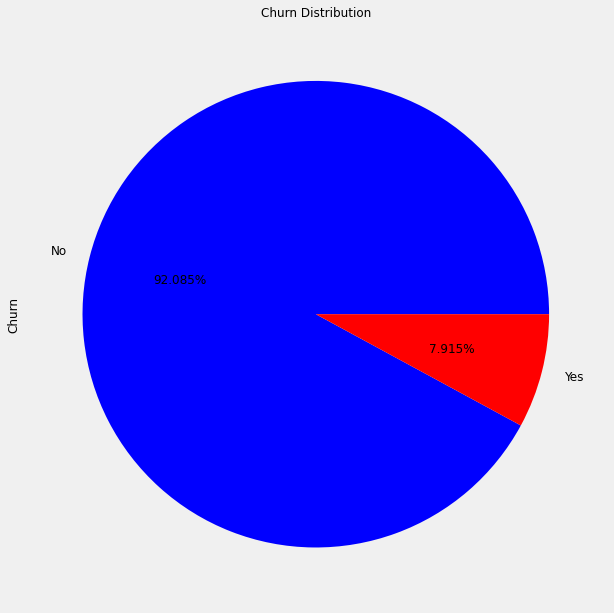

In [60]:
# Checking the customer churn distribution
ax = (tele_highval_cust['churn'].value_counts()*100.0 /len(tele_highval_cust)).plot.pie(autopct='%.3f%%', 
                                                                                        labels = ['No', 'Yes'],
                                                                                        colors =['b','r'],
                                                                                        figsize =(10,10), 
                                                                                        fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         Data is highly imbalanced. We need to use Random Over Sampling or Random Under Sampling or SMOTE technique for data sampling before building the model. 
    </span>    
</div>

<h6> Categorical Data Analysis </h6>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


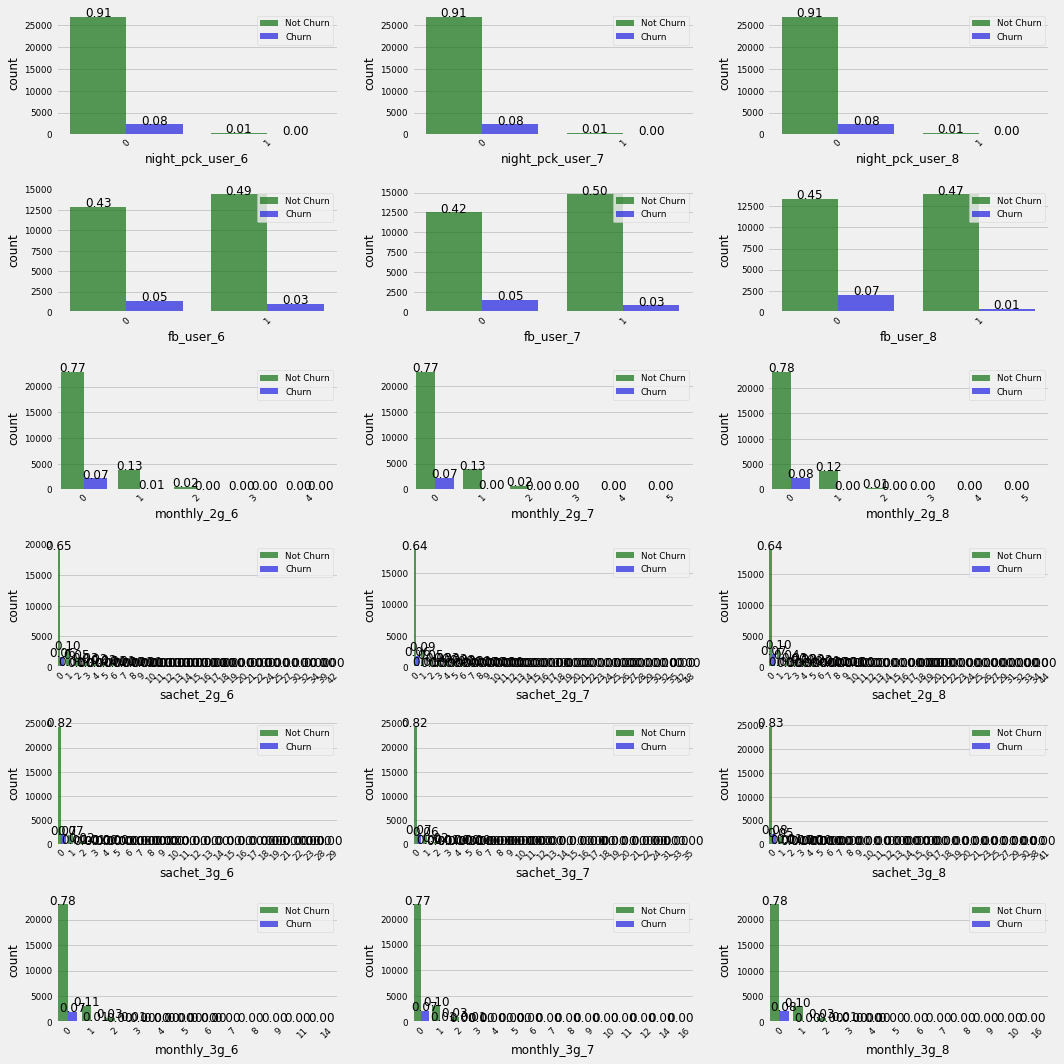

In [61]:
#Plotting a countplot with all the variables
fig, axes = plt.subplots(round(len(cat_cols) / 3), 3, figsize=(15, 15))

total = float(len(tele_highval_cust))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_cols[i], alpha=0.7, data=tele_highval_cust, hue=tele_highval_cust['churn'],palette=['g','b'], ax=ax)
        # Renaming the Legends from 0/1 to Not Churn/Churn
        ax.legend(['Not Churn','Churn'],loc="upper right")
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(cat_cols[i],fontsize=12)
        ax.set_ylabel('count',fontsize=12)
        # adding annotations
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/total),
                    ha="center",
                    fontsize=12)
        
fig.tight_layout()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         <ul>
             <li>From the night_pck_user variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.</li>
             <li>Similarly from the fb user variables, it can be inferred that almost 52 % of users are not using FB in all the 3 months.</li>
             <li>82% of the users have no monthly_2g and monthly_3g packs in all the 3 months. Customers who have opted for the 1 month plan have almost not churned out, which is a good indicator. Also this count is decreasing across the months.</li>
             <li>Around 70% of the Users have not opted for sachet_2g and sachet_3g packs across the months and this trend is also observed to be decreasing and these users have churned out a lot compared to the users who use these sachet packs.</li>
        </ul>
    </span>    
</div>

<h6> Numerical Data Analysis </h6>

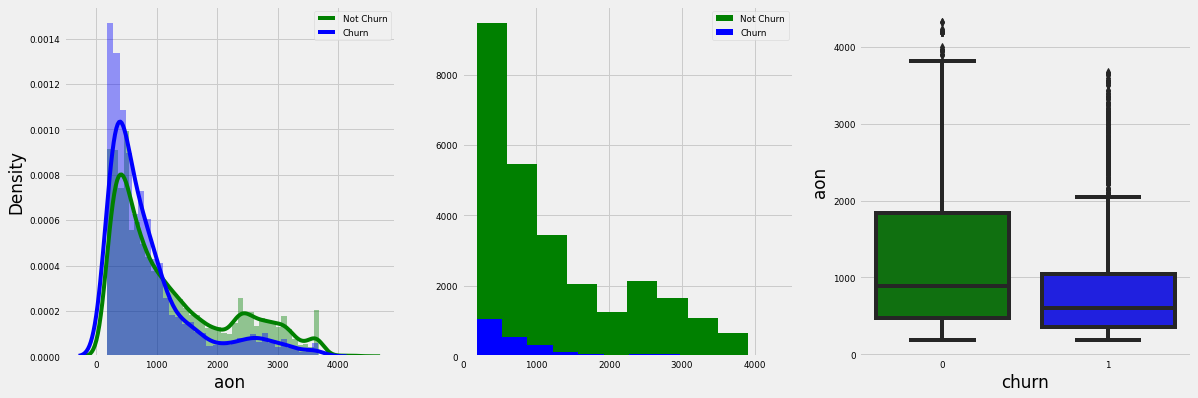

In [62]:
# Data Distribution
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.distplot(tele_highval_cust.loc[tele_highval_cust['churn']==0,'aon'],hist=True, color = 'g')
sns.distplot(tele_highval_cust.loc[tele_highval_cust['churn']==1,'aon'],hist=True, color='b')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,2)
plt.hist(tele_highval_cust.loc[tele_highval_cust['churn']==0,'aon'],color = 'g')
plt.hist(tele_highval_cust.loc[tele_highval_cust['churn']==1,'aon'],color = 'b')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,3)
sns.boxplot(y='aon', data=tele_highval_cust, x='churn',palette =['g','b'])

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          This plot shows that as the user has been with the network for more period, chances of churn is less and this could be focussed as one of the parameters to retain the customers. Lets check the other numerical data distribution. This is also shown in the boxplot where 25th to 75th percentile of churn customers have lower value than non-churn customers. 
    </span>    
</div>

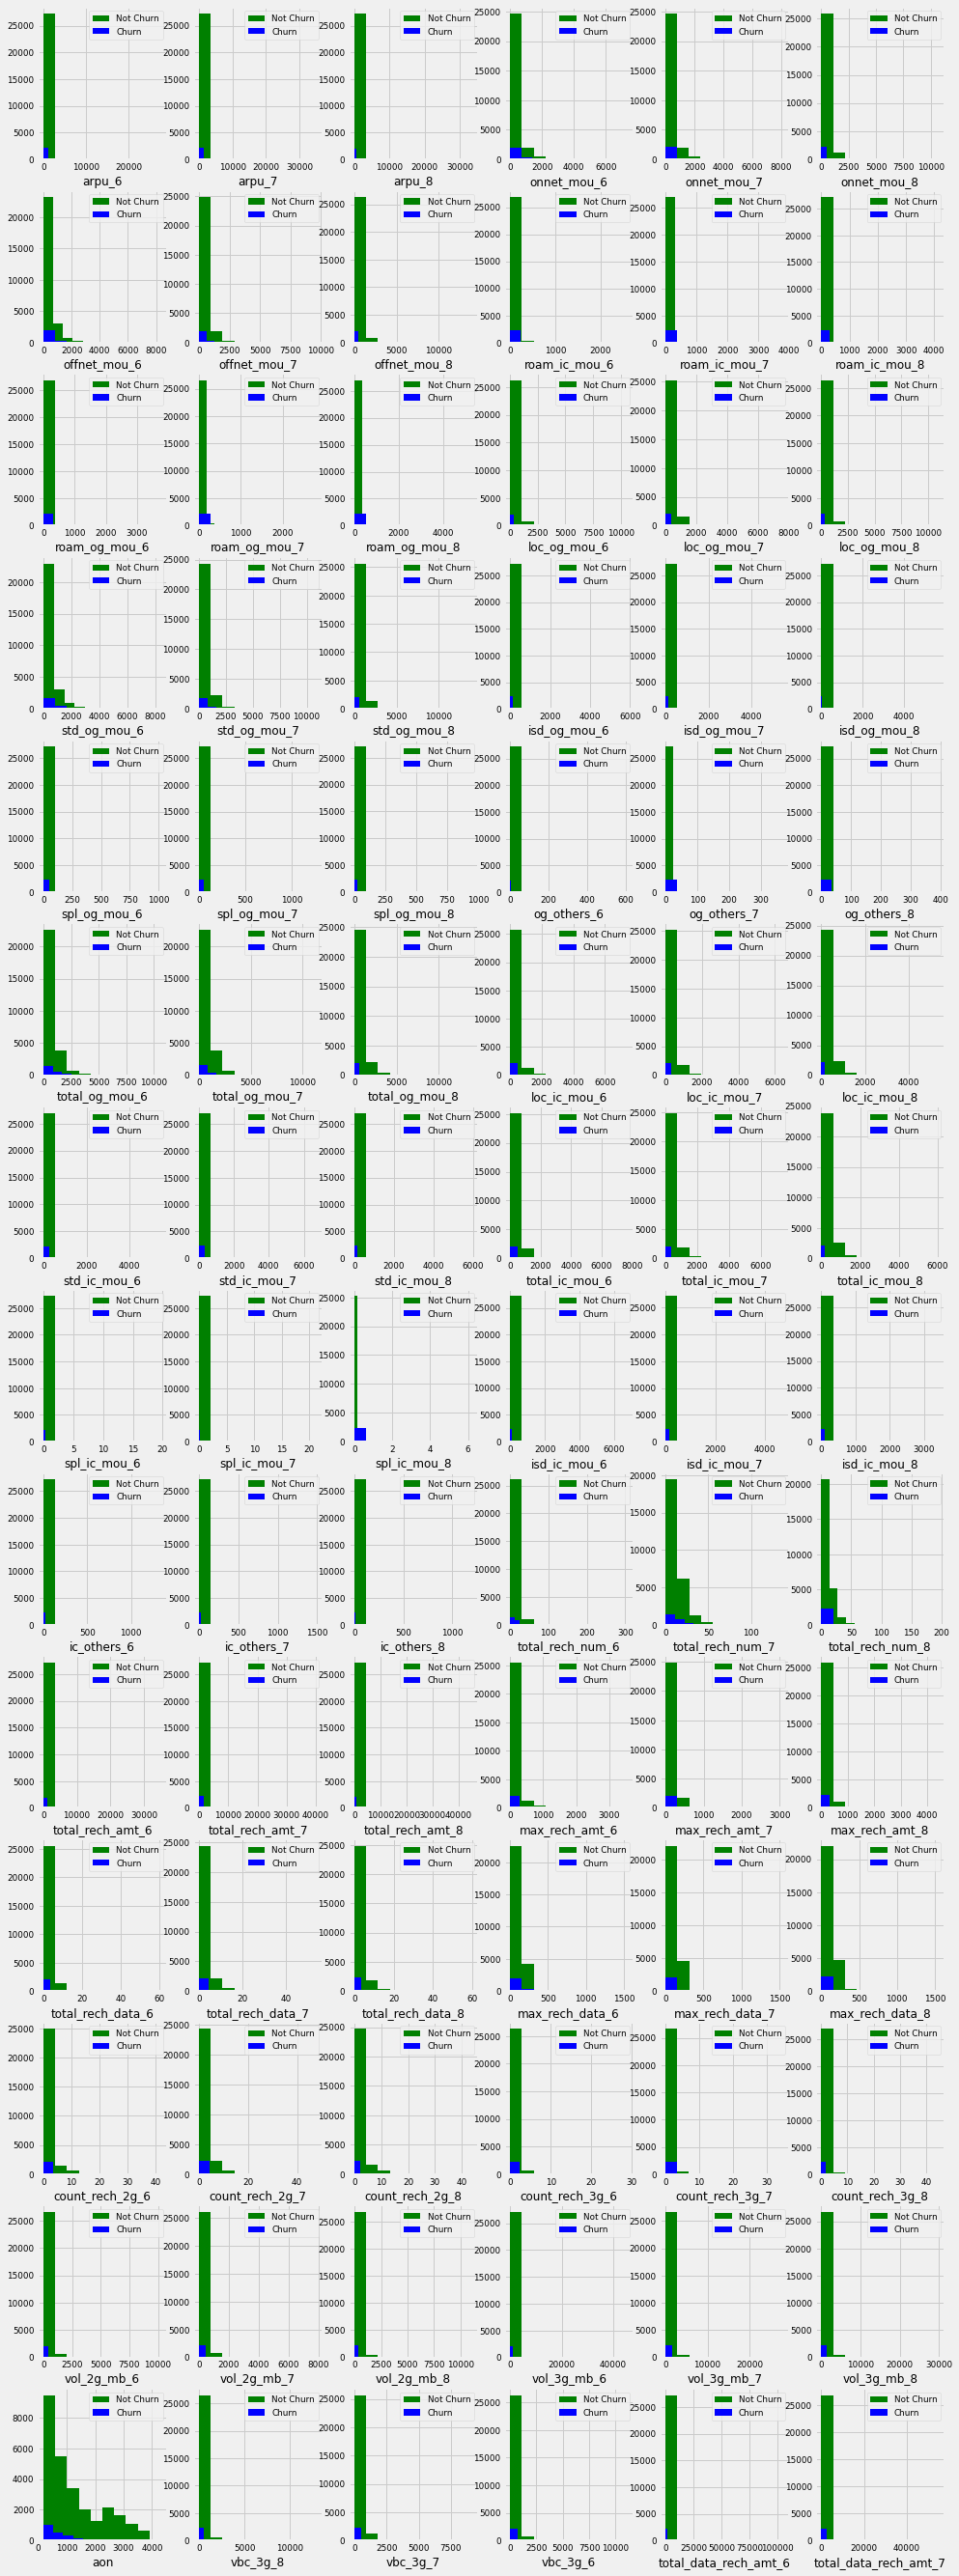

In [63]:
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.hist(tele_highval_cust.loc[tele_highval_cust['churn']==0, num_cols[i]],color='g')
        ax.hist(tele_highval_cust.loc[tele_highval_cust['churn']==1, num_cols[i]],color='b')
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(num_cols[i],fontsize=12)
        ax.legend(['Not Churn','Churn'],loc = 'best')        
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li><b>arpu:</b> People who have churned out seem to have average revenue per user as zero in all the 3 months.</li>
              <li><b>ONNET:</b> All kind of calls within the same operator network - minutes of voice calls Calls within same operator is very less for churned customers</li>
              <li><b>OFFNET:</b> All kind of calls outside the operator T network - minutes of voice calls This seems to be higher than ONNET calls.</li>
              <li> Roaming incoming and outgoing calls have been higher indicating that the customers could have churned due to the location change. Similarly local incoming and outgoing calls are less.</li>
              <li> Special incoming calls is high in the 8th month for the churned customers.</li>
              <li> total_rech_amt is getting less with each month.</li>
              <li>3g usage has been increasing among churned customers, hence increasing better 3g connectivity might help to reduce the churn</li>
              <li> Data is not normally distributed</li>
        </ul>
    </span>    
</div>

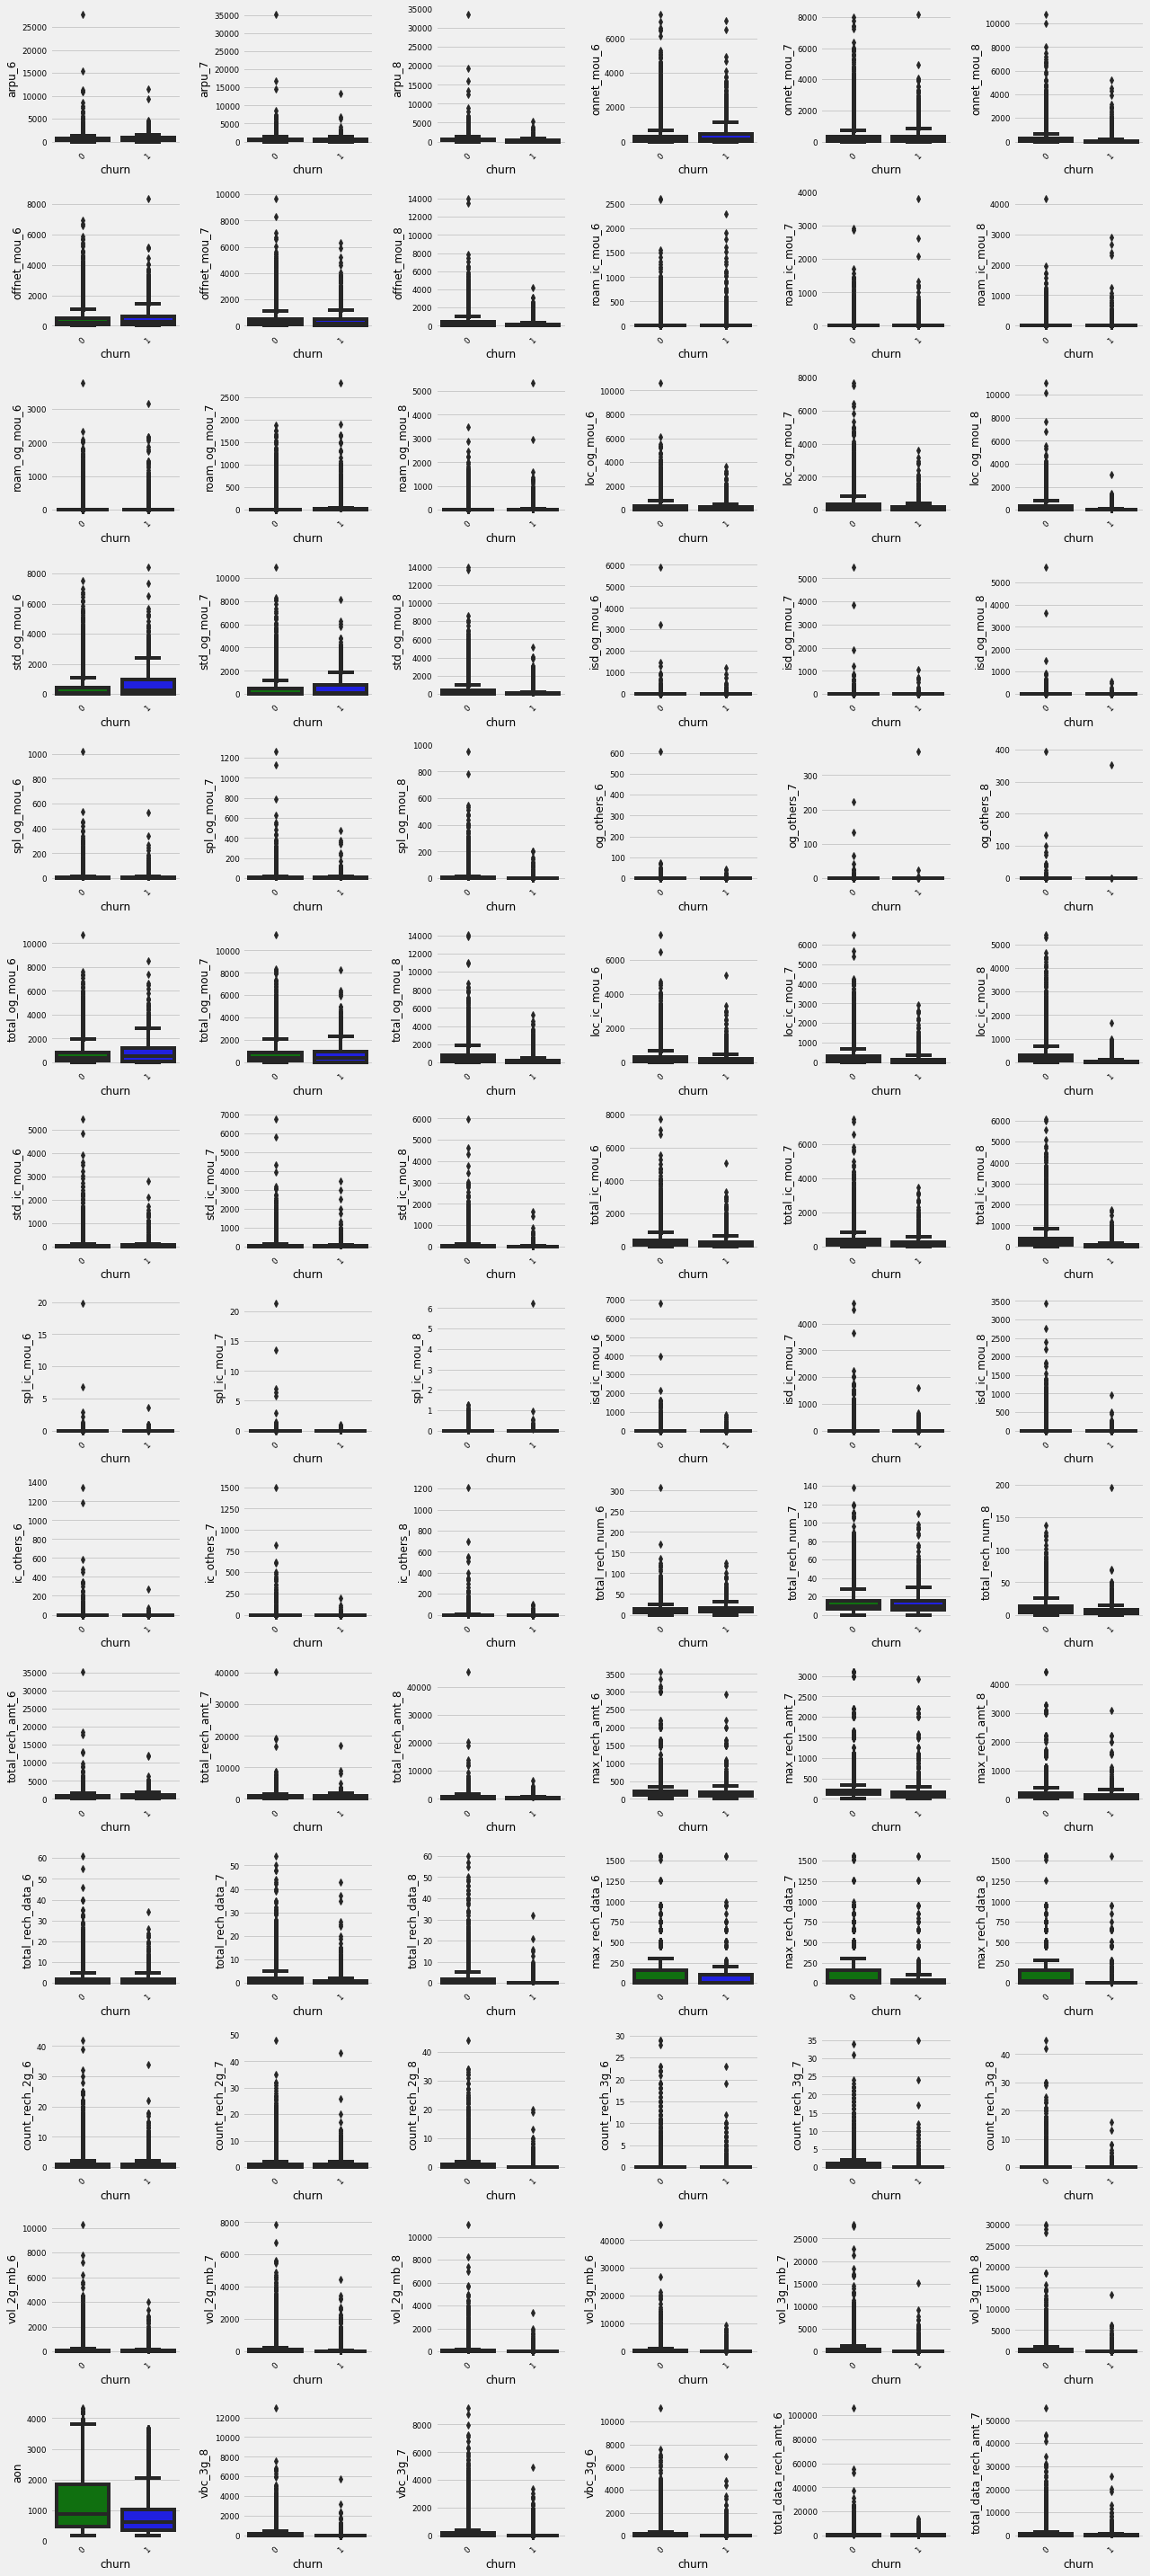

In [64]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','b'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
           <ul>
               <li> Most of the columns have outliers. </li>
               <li> The data is not normally distributed. </li>
               <li> The variance is very high among the columns. We can apply boxcox transformation </li>
               <li> roam_ic_mou variables have higher value for churned customers than the non-churned customers indicating customers who travel or move to other places and receive more calls tend to churn out. std_og_mou variables also follow this pattern. </li>
               <li> roam_og_mou variables do not follow this pattern indicating customers who travel and make the calls stay active in the network. </li>
               <li> total_og variables indicate there is a steady decrease in the outgoing calls made by the churned customers. </li>
               <li> spl_ic variables show that there has been a decrease in the special incoming calls in the 8th month which might have played a role for churn.</li>
               <li> count_rech_2g and count_rech_3g variables show that there is a decrease during the 8th month </li>
        </ul>
    </span>    
</div>

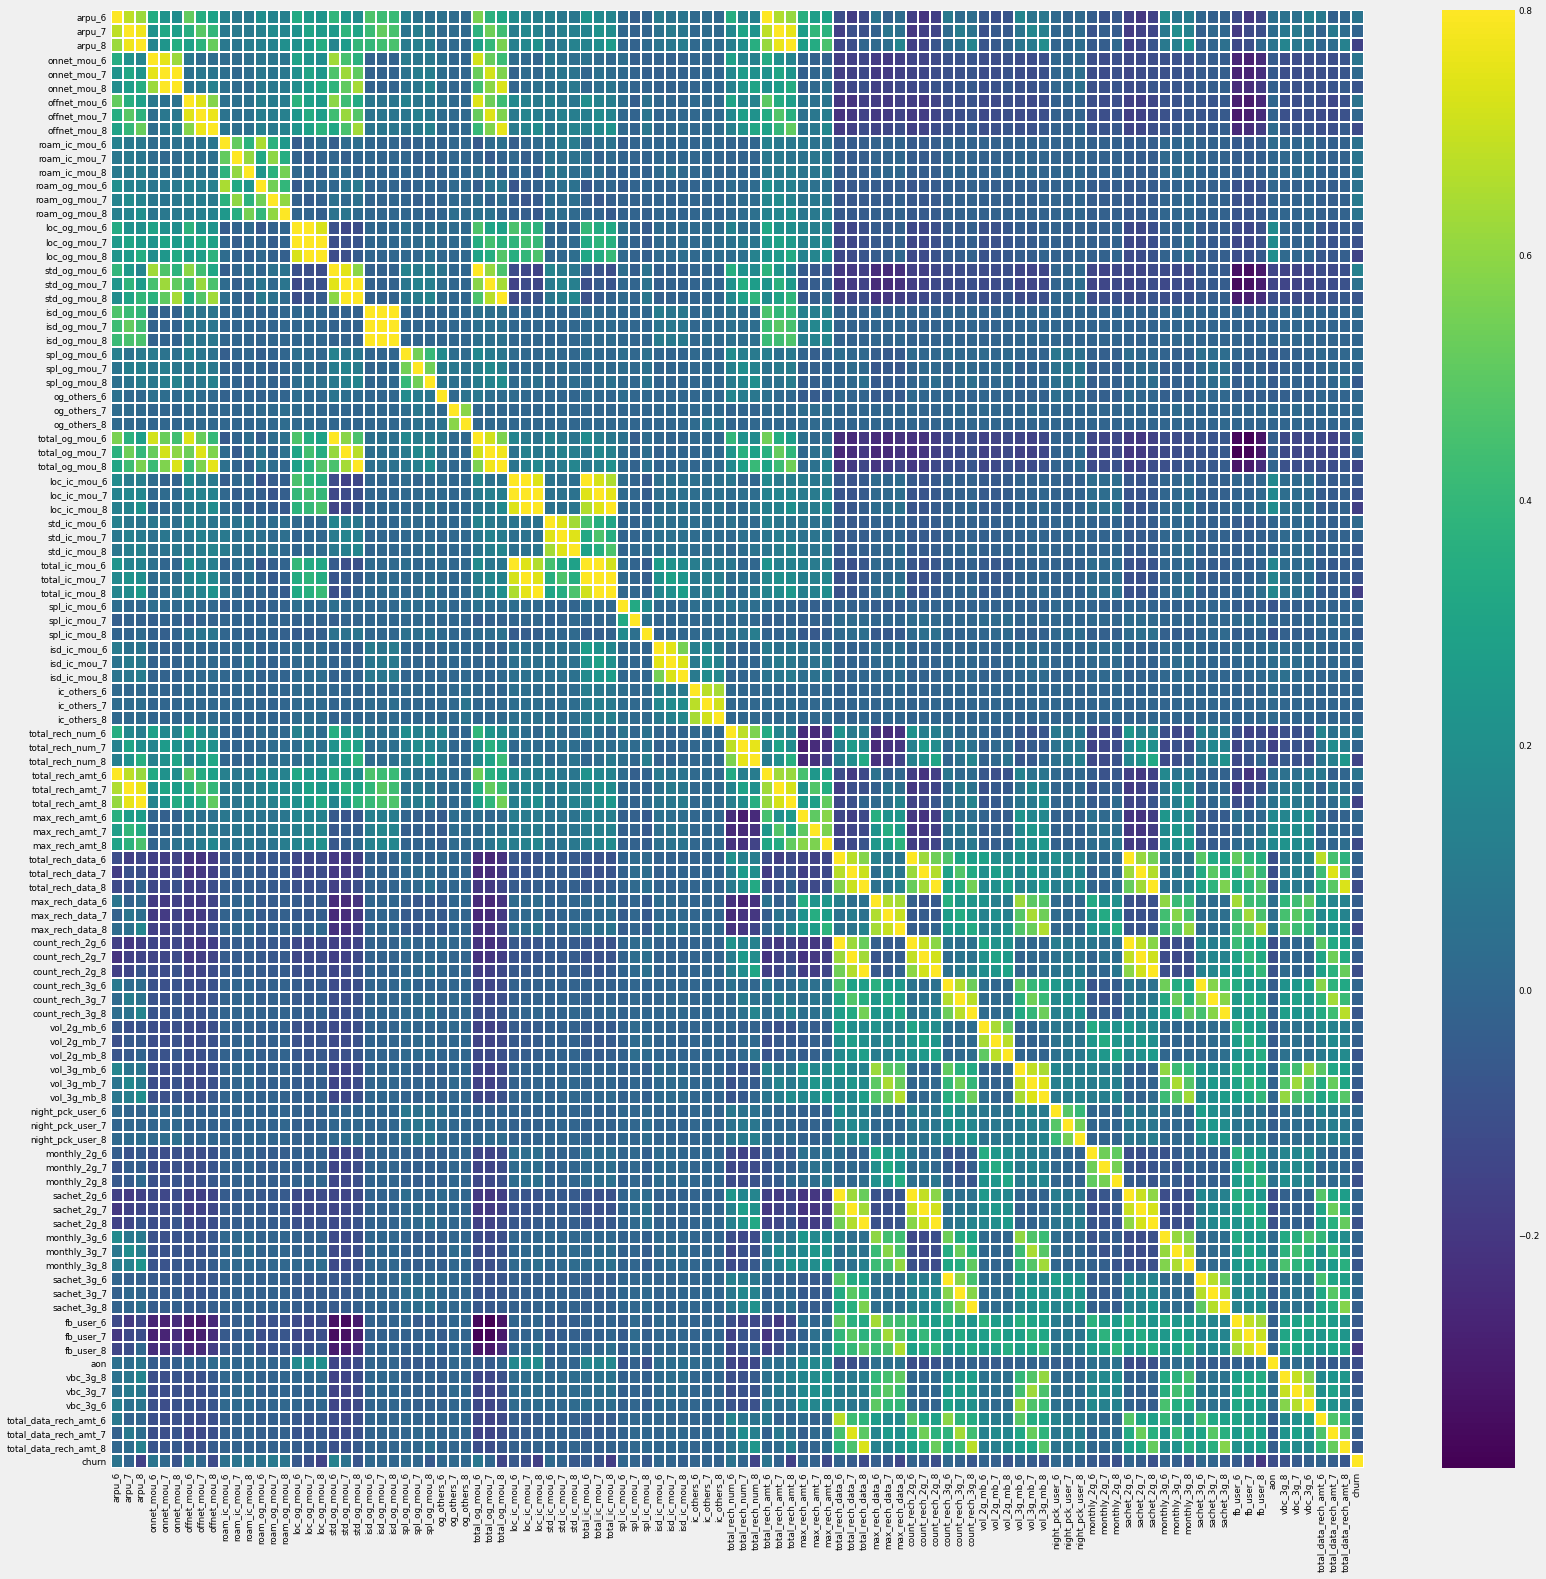

In [65]:
# Checking the correlation matrix
corrmat = tele_highval_cust.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8,cmap="viridis",linewidth =1)
plt.show()

In [66]:
# Checking the top correlated features
corr_matrix = tele_highval_cust.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


<a id="dataprep"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Data Preparation
            </span>   
        </font>    
</h1>

<h6> Outliers Treatment</h6>

In [67]:
#Find skewed numerical features
skew_features = tele_highval_cust[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.2 ".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 85 numerical features with Skew > 0.2 


og_others_7              111.136693
og_others_6              109.666418
og_others_8               99.486834
isd_og_mou_8              88.957842
isd_og_mou_6              87.011130
isd_og_mou_7              83.406637
spl_ic_mou_7              72.455557
ic_others_6               58.476965
ic_others_8               46.938700
ic_others_7               44.139529
spl_ic_mou_6              41.540185
isd_ic_mou_6              34.696418
isd_ic_mou_7              24.405269
total_data_rech_amt_6     22.639450
spl_og_mou_7              19.449973
total_data_rech_amt_8     19.062494
roam_ic_mou_8             18.590514
total_rech_amt_8          18.073139
arpu_7                    17.681620
isd_ic_mou_8              17.417915
roam_ic_mou_7             17.264460
total_rech_amt_7          16.200891
arpu_8                    15.417555
spl_og_mou_6              15.414604
roam_og_mou_8             14.479325
spl_og_mou_8              14.429340
std_ic_mou_7              13.514776
total_rech_amt_6          13

In [68]:
# We will use Boxcox transformation for numerical variables 

for i in skew_index:
    tele_highval_cust[i] = boxcox1p(tele_highval_cust[i], boxcox_normmax(tele_highval_cust[i] + 1))

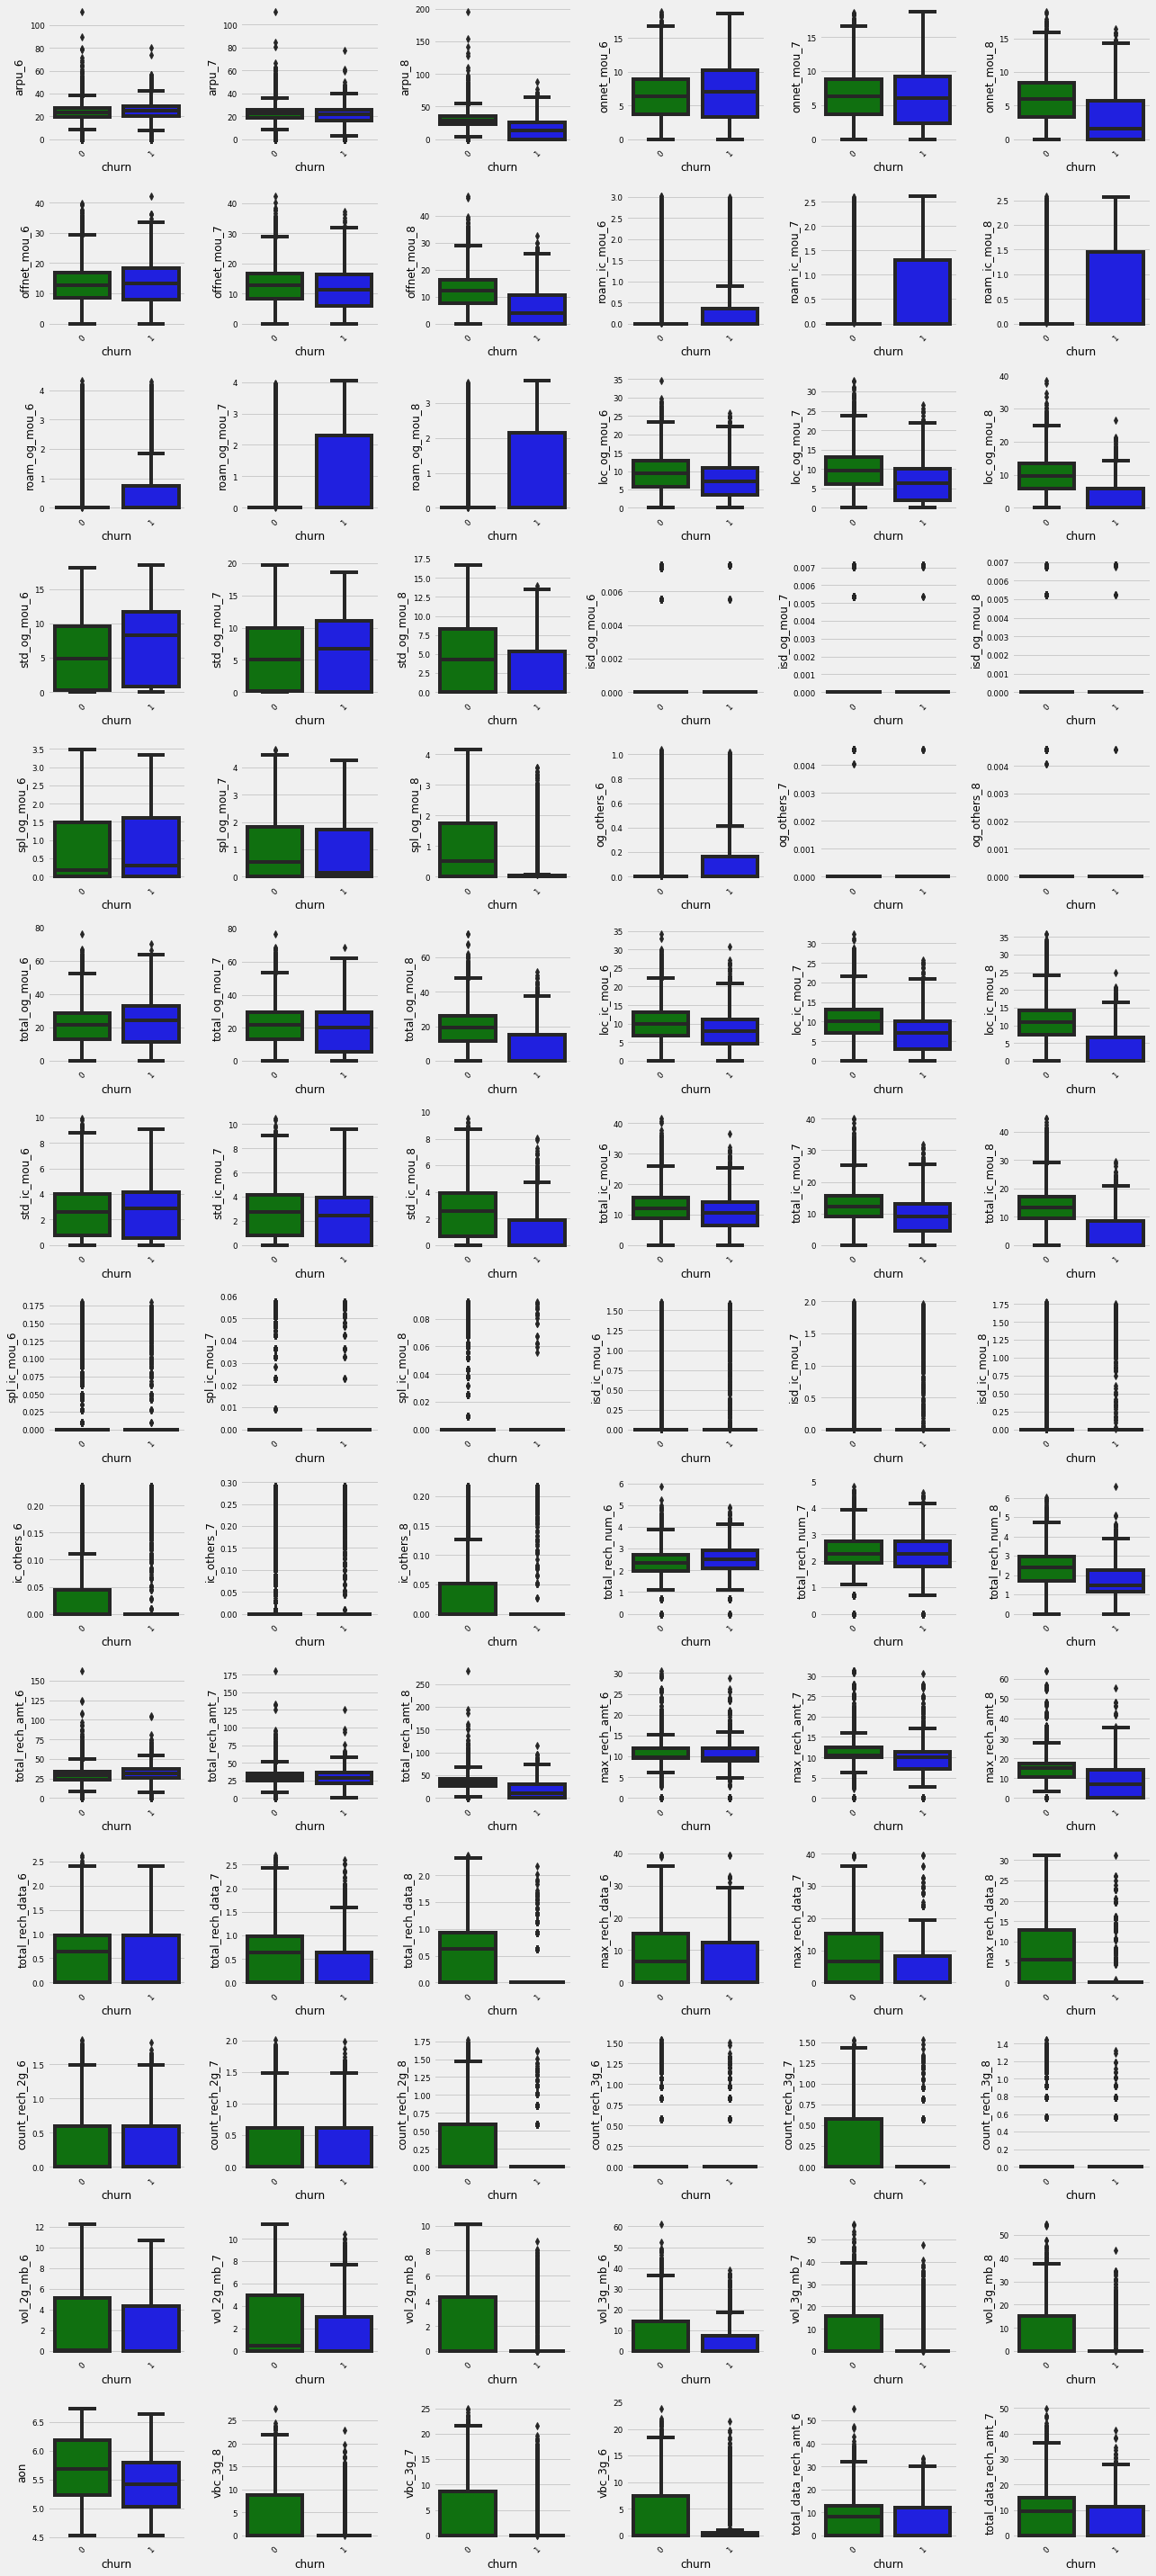

In [69]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','b'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            We have treated most of the numerical columns data for outlier now. Next Step is to conduct feature engineering. 
    </span>    
</div>

<h6> Feature Engineering </h6>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
            Month 6 and 7th are good phase. We will use a average value of Month 6 and 7 to determine goodphase values. This will also reduce the number of features for model building. 
    </span>    
</div>

In [70]:
tele_highval_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'churn'],
      dtype='object', length=104)

In [71]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [72]:
# Creating features for good phase and action phase column : 

cols = ["arpu","onnet_mou","offnet_mou","roam_ic_mou","roam_og_mou","loc_og_mou","std_og_mou",
        "isd_og_mou","spl_og_mou","og_others","total_og_mou","loc_ic_mou","std_ic_mou",
        "spl_ic_mou","isd_ic_mou","ic_others","total_ic_mou","total_rech_num","total_rech_amt",
        "max_rech_amt","total_rech_data","max_rech_data","count_rech_2g","count_rech_3g",
        "vol_2g_mb","vol_3g_mb","monthly_2g","sachet_2g","sachet_3g",
        "monthly_3g","vbc_3g","total_data_rech_amt"]

for col in cols : 
    tele_highval_cust = derive_good_action_phase(tele_highval_cust, col)
    print (col)

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_ic_mou
total_rech_num
total_rech_amt
max_rech_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
sachet_3g
monthly_3g
vbc_3g
total_data_rech_amt


In [73]:
#Checking the dataframe after conversion
tele_highval_cust.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0                 0                 0                 0          1          1   
1                 0                 0                 0          0          0   
2                 0                 0                 0          0          1   
3                 0                 0                 0          0          0   
4                 0                 0                 0          0          1   

   fb_user_8       aon  churn  arpu_good_phase  arpu_action_phase  \
0          1  5.742220      1        16.081833          20.713069   
1          0  5.612020      1        32.670624          70.113930   
2          1  4.945873      0        21.795479          16.778963   
3          0  5.536786      0        24.097627          34.307603   
4          1  5.413329      0        12.945043          26.644541   

   onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
0              0.000000                0.000000               0.000000   
1              5.555118                5.302856              16.895627   
2              9.568582                4.644254               8.971096   
3              6.937999                6.164248              19.875306   
4              5.338160                4.574672               8.963148   

   offnet_mou_action_phase  roam_ic_mou_good_phase  roam_ic_mou_action_phase  \
0                 0.000000                0.000000                  0.000000   
1                14.349753                1.951453                  1.958364   
2                10.516334                0.000000                  0.000000   
3                20.768192                0.000000                  0.000000   
4                12.210779                0.000000                  0.000000   

   roam_og_mou_good_phase  roam_og_mou_action_phase  loc_og_mou_good_phase  \
0                0.000000                  0.000000               0.000000   
1                2.245214                  2.439742              14.349623   
2                0.000000                  0.000000              12.773657   
3                0.000000                  0.000000               8.394549   
4                0.000000                  0.000000               9.429600   

   loc_og_mou_action_phase  std_og_mou_good_phase  std_og_mou_action_phase  \
0                 0.000000               0.000000                 0.000000   
1                12.252005               5.829424                 5.579033   
2                 7.419760               7.176628                 5.952949   
3                 9.688926              11.403357                10.130424   
4                10.913341               1.818925                 4.553437   

   isd_og_mou_good_phase  isd_og_mou_action_phase  spl_og_mou_good_phase  \
0               0.000000                 0.000000               0.000000   
1               0.003566                 0.006833               0.706747   
2               0.000000                 0.000000               0.000000   
3               0.000000                 0.000000               0.000000   
4               0.002682                 0.000000               0.047143   

   spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  \
0                 0.000000                   0.0                     0.0   
1                 1.722190                   0.0                     0.0   
2                 2.005312                   0.0                     0.0   
3                 0.000000                   0.0                     0.0   
4                 2.338096                   0.0                     0.0   

   total_og_mou_good_phase  total_og_mou_action_phase  loc_ic_mou_good_phase  \
0                 0.000000                   0.000000               0.000000   
1                24.123338                  18.781594              14.011507   
2                22.699952                  14.099010               6.561508   
3  

In [74]:
#Checking the new shape of the dataframe
tele_highval_cust.shape

(29591, 72)

<h6> Train- Test Split </h6>

In [75]:
# We will use sklearn train-test-split we will convert the main dataset to train and test dataset with 70% and 30% split

#Target variable
X = tele_highval_cust.drop('churn', axis = 1)
y = tele_highval_cust[['churn']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Checkiong the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (20713, 71)
 Shape of y_train is :  (20713, 1)
 Shape of X_test is  :  (8878, 71)
 Shape of y_test is  :  (8878, 1)


<h6> Feature Scaling </h6>

In [76]:
# Storing the non binary column names as a list for performaing StandardScaler
feature_col =[]
data_col = tele_highval_cust.columns.to_list()

for col in data_col:
    if tele_highval_cust[col].nunique() > 2:
        feature_col.append(col)
        
feature_col

['aon',
 'arpu_good_phase',
 'arpu_action_phase',
 'onnet_mou_good_phase',
 'onnet_mou_action_phase',
 'offnet_mou_good_phase',
 'offnet_mou_action_phase',
 'roam_ic_mou_good_phase',
 'roam_ic_mou_action_phase',
 'roam_og_mou_good_phase',
 'roam_og_mou_action_phase',
 'loc_og_mou_good_phase',
 'loc_og_mou_action_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'isd_og_mou_good_phase',
 'isd_og_mou_action_phase',
 'spl_og_mou_good_phase',
 'spl_og_mou_action_phase',
 'og_others_good_phase',
 'og_others_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_good_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_good_phase',
 'std_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_good_phase',
 'isd_ic_mou_action_phase',
 'ic_others_good_phase',
 'ic_others_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'total_rech_num_good_phase',
 'total_rech_num_action_phase',
 'total_rech_amt_g

In [77]:
#Using StandardScaler for Scaling the X_train and X_test
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train[feature_col])

X_train[feature_col] = scaler.fit_transform(X_train[feature_col])
X_test[feature_col] = scaler.transform(X_test[feature_col])

# Checking the scaled dataframe
X_train.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
28117                 0                 0                 0          1   
1574                  0                 0                 0          1   
22863                 0                 0                 0          1   
8840                  0                 0                 0          1   
6279                  0                 0                 0          1   

       fb_user_7  fb_user_8       aon  arpu_good_phase  arpu_action_phase  \
28117          1          1 -0.528861        -0.467471          -0.319068   
1574           1          1  0.233154        -0.818194          -0.430065   
22863          1          1  0.548641        -0.452190          -0.813731   
8840           1          1 -1.843725         0.146634          -0.187263   
6279           1          1  1.354596        -0.565391          -0.819506   

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
28117             -1.051506               -1.047610              -0.597360   
1574              -1.347858               -1.281932              -0.214108   
22863             -0.237607               -0.641922              -0.686547   
8840               1.042633                0.866636              -0.291516   
6279              -1.199350               -1.551369              -1.015964   

       offnet_mou_action_phase  roam_ic_mou_good_phase  \
28117                -0.154047                -0.54328   
1574                 -0.501223                -0.54328   
22863                -0.581803                -0.54328   
8840                  0.025460                -0.54328   
6279                 -1.490175                -0.54328   

       roam_ic_mou_action_phase  roam_og_mou_good_phase  \
28117                  -0.44171               -0.545471   
1574                   -0.44171               -0.545471   
22863                  -0.44171               -0.545471   
8840                   -0.44171               -0.545471   
6279                   -0.44171               -0.545471   

       roam_og_mou_action_phase  loc_og_mou_good_phase  \
28117                 -0.440755              -0.158734   
1574                  -0.440755              -0.050150   
22863                 -0.440755              -0.019972   
8840                  -0.440755               1.241791   
6279                  -0.440755              -0.855093   

       loc_og_mou_action_phase  std_og_mou_good_phase  \
28117                 0.156611              -1.208238   
1574                 -0.711955              -1.099441   
22863                -0.484903              -1.208238   
8840                  1.060244              -0.721129   
6279                 -1.585997              -0.930993   

       std_og_mou_action_phase  isd_og_mou_good_phase  \
28117                -1.102076              -0.337428   
1574                 -0.056580              -0.337428   
22863                -1.102076              -0.337428   
8840                 -0.250553              -0.337428   
6279                 -0.820039              -0.337428   

       isd_og_mou_action_phase  spl_og_mou_good_phase  \
28117                -0.259076              -1.026313   
1574                 -0.259076               2.115867   
22863                -0.259076               1.237381   
8840                 -0.259076               0.412287   
6279                 -0.259076               1.349448   

       spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  \
28117                -0.864140             -0.503468               -0.076965   
1574                  1.540091              1.481465               -0.076965   
22863                 1.920525             -0.503468               -0.076965   
8840                 -0.864140             -0.503468               -0.076965   
6279                 -0.146499             -0.503468               -0.076965   

       total_og_mou_good_phase  total_og_mou_action_phase  \
28117 

In [78]:
# Checking the scaled dataframe
X_test.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
3945                  0                 0                 0          0   
18981                 0                 0                 0          0   
24100                 0                 0                 0          0   
25300                 0                 0                 0          1   
15026                 0                 0                 0          1   

       fb_user_7  fb_user_8       aon  arpu_good_phase  arpu_action_phase  \
3945           0          0 -0.126491         0.031503           0.198380   
18981          0          0 -0.766292         0.401345           1.028519   
24100          0          0  0.807275        -1.233034           0.217727   
25300          1          1  0.671698         1.238497           1.044121   
15026          1          1 -1.165471        -1.501047          -0.270186   

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
3945               1.404110                1.512551              -0.850806   
18981              0.505724                1.320249               1.138970   
24100              0.152057                0.460959               0.132609   
25300              0.037504                0.316263               0.658094   
15026             -1.662726               -1.551369              -1.442818   

       offnet_mou_action_phase  roam_ic_mou_good_phase  \
3945                 -0.266763               -0.543280   
18981                 1.734024                0.780640   
24100                 0.310991                1.408633   
25300                 0.794836                2.537277   
15026                -1.555746               -0.543280   

       roam_ic_mou_action_phase  roam_og_mou_good_phase  \
3945                  -0.441710               -0.545471   
18981                 -0.441710                1.001603   
24100                  0.802457                1.958513   
25300                  2.386037                2.070175   
15026                 -0.441710               -0.545471   

       roam_og_mou_action_phase  loc_og_mou_good_phase  \
3945                  -0.440755              -0.976885   
18981                 -0.440755              -0.213913   
24100                  1.623131              -0.330329   
25300                  1.449200               1.125470   
15026                 -0.440755              -1.150212   

       loc_og_mou_action_phase  std_og_mou_good_phase  \
3945                 -1.008852               1.219854   
18981                 0.567866               1.170303   
24100                 0.023565               0.668732   
25300                 1.274169              -1.061022   
15026                -1.585997              -1.208238   

       std_og_mou_action_phase  isd_og_mou_good_phase  \
3945                  1.393512              -0.337428   
18981                 1.700215              -0.337428   
24100                 0.845012              -0.337428   
25300                -0.616228              -0.337428   
15026                -1.102076              -0.337428   

       isd_og_mou_action_phase  spl_og_mou_good_phase  \
3945                 -0.259076               0.409806   
18981                -0.259076               0.373077   
24100                -0.259076              -1.026313   
25300                -0.259076               1.516538   
15026                -0.259076              -0.207703   

       spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  \
3945                 -0.313011             -0.503468               -0.076965   
18981                 0.982632             -0.503468               -0.076965   
24100                -0.864140             -0.503468               -0.076965   
25300                -0.864140             -0.503468               -0.076965   
15026                 0.163114             -0.503468               -0.076965   

       total_og_mou_good_phase  total_og_mou_action_phase  \
3945  

<h6> Data Imbalance Treatment </h6>

<div>
    <span style='font-family:Georgia'>
       The imbalance data treatment is necessary to increase the precision and recall factors of the model. The following algorithms will be used for treating the imbalanced data set. 
        <ol>
            <li><font color ='blue'> Under Sampling :</font> </li>
            <ul>
                <li><b><font color ='coral'> Random Under Sampling :</font></b> involved randomly selecting examples from the majority class and deleting them from the training dataset.</li>
            </ul>
            <li><font color ='blue'> Over Sampling :</font> </li>
            <ul>
                <li><b><font color ='coral'> Random Over Sampling :</font></b>  generates new samples by random resampling with replacement of under represented class</li>
                <li><b><font color ='coral'> Synthetic Minority Oversampling (SMOTE):</font></b> works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.</li>
            </ul>
            <li><font color ='blue'> Combined Under & Over Sampling :</font> </li>
            <ul>
                <li><b><font color ='coral'> SMOTEENN :</font></b>  SMOTE + Edited NearestNeighbors </li>
                <li><b><font color ='coral'> SMOTETomek:</font></b> SMOTE + Tomek Links</li>
            </ul>
        </ol>
    </span>
    <br>
    <span style='font-family:Georgia'>
        SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Imbalanced-learn provides two ready-to-use combined samplers: SMOTEENN and SMOTETomek. <br><br>
        SMOTEENN is more aggressive at downsampling the majority class than Tomek Links, providing more in-depth cleaning. They apply the method, removing examples from both the majority and minority classes. <br><br>
        It is not possible to check different sampling techniques on very cost sensitive Machine Learning models like SVM, Decision Trees, Random Forest. For this Case Study, we will particularily use SMOTEENN sampling technique to handle imbalanced dataset as it is uses both over-sampling and under-sampling method and helps in cleaning noisy samples.
    </span>
</div>

In [79]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote - SMOTEENN
sampling = SMOTEENN(random_state = 0)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)
print (" Shape of the X_train after resampling : ",X_train_resampled.shape)
print (" Shape of the Y_train after resampling : ",y_train_resampled.shape)

 Shape of the X_train after resampling :  (34146, 71)
 Shape of the Y_train after resampling :  (34146, 1)


In [80]:
# RandomOverSampler
X_r_over_sampled, y_r_over_sampled = RandomOverSampler(random_state = 100).fit_resample(X_train, y_train)

X_r_over_sampled = pd.DataFrame(data = X_r_over_sampled)
y_r_over_sampled = pd.DataFrame(data = y_r_over_sampled)
print (" Shape of the X_train after Random Over Sampling : ",X_r_over_sampled.shape)
print (" Shape of the Y_train after Random Over Sampling : ",y_r_over_sampled.shape)

 Shape of the X_train after Random Over Sampling :  (38134, 71)
 Shape of the Y_train after Random Over Sampling :  (38134, 1)


In [81]:
# RandomUnderSampler
X_r_under_sampled, y_r_under_sampled = RandomUnderSampler(random_state = 100).fit_resample(X_train, y_train)

X_r_under_sampled = pd.DataFrame(data = X_r_under_sampled)
y_r_under_sampled = pd.DataFrame(data = y_r_under_sampled)
print (" Shape of the X_train after Random Under Sampling : ",X_r_under_sampled.shape)
print (" Shape of the Y_train after Random Under Sampling : ",y_r_under_sampled.shape)

 Shape of the X_train after Random Under Sampling :  (3292, 71)
 Shape of the Y_train after Random Under Sampling :  (3292, 1)


In [82]:
# SMOTE
X_smote_samples, y_smote_samples = SMOTE(n_jobs = -1, random_state = 100).fit_resample(X_train, y_train)

X_smote_samples = pd.DataFrame(data = X_smote_samples)
y_smote_samples = pd.DataFrame(data = y_smote_samples)
print (" Shape of the X_train after SMOTE : ",X_smote_samples.shape)
print (" Shape of the Y_train after SMOTE : ",y_smote_samples.shape)

 Shape of the X_train after SMOTE :  (38134, 71)
 Shape of the Y_train after SMOTE :  (38134, 1)


<a id="modelbuild"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Model Building
            </span>   
        </font>    
</h1>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
            For the model building, we have to consider many factors. Our target for the model is to identify all high value customers who have potential to churn. For that we have to minimize False Negative. To achieve this, we need to build our models to maximize Recall value as much as possible. As the telecom company wants to retain their customer as well as the profit, we will not focus much on False Positive. i.e. we will trade Precision value (increase of False Positive) of the model to maximize Recall. <br><br>
        For model building we will be using following different models : <br>
        <ol>
            <li> Logistic Regression </li>
            <li> Support Vector Machine </li>
            <li> Random Forest </li>
            <li> AdaBoost </li>
            <li> XGBoost </li>
        </ol>
        Now, as our data is imbalanced, we will use RandomUnderSampler, RandomOverSample, SMOTE and SMOTEENN methods for resampling of X_train and Y_train.<br>
        From the correlation heatmap, we know that our data have multicolinearity. To select the best impactful features, we will use RFE. But RFE does not ensure that multicollinearity is not present among data, which makes the model interpretation incorrect, though the model prediction would be correct.<br>
        In the next model for Logistic Regression, we will also use Principal Component Analysis or PCA for dimension reduction. <br>
        As rest of the models are not that affected by multicolinearity, we will use original dataset with imbalance treatment using SMOTEENN and Hyper-Parameter Tuning using GridSearchCV method to derive the final models in each type. As our target is not to overtrain the model, we will use certain components in each  model to ensure that the model is conservative enough to avoid overtraining. 
    </span>    
</div>

<span style='font-family:Georgia'>
    <font color = green>
        <h3> Confusion Matrix : </h3>
    </font>
    <table>
    <thead>
    <tr><th></th><th>Predicted Negative(0)</th><th>Predicted Positive(1)</th></tr>
    </thead>
    <tbody>
        <tr><td><b>Actual Negative(0)</b></td><td><font color = blue>True Negative (TN)</font> </td><td><font color = blue>False Postive (FP)</font></td></tr>
        <tr><td><b>Actual Positive(1)</b></td><td><font color = blue>False Negative (FN)</font></td><td><font color = blue>True Positive (TP)</font></td></tr>
    </tbody>
</table>
</span>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Accuracy = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">(TP + TN)</div>
                    <div style="text-align: center;">(TP + TN + FP + FN)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Precision = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">TP</div>
                    <div style="text-align: center;">(TP + FP)</div>
                </span>
            </font>
        </span>
    </span>
</div>    
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> Recall = </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;">TP</div>
                    <div style="text-align: center;">(TP + FN)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <math> F Measure (F1) = 2 * </math>
                <span style="display: inline-block;vertical-align: middle;">
                    <div style="text-align: center;border-bottom: 1px solid black;"> Precision * Recall </div>
                    <div style="text-align: center;">(Precision + Recall)</div>
                </span>
            </font>
        </span>
    </span>
</div>
<hr>
<div>
    <span style="font-size:18" >
        <span style ='font-family:Georgia'>
            <font color = blue >
                <ul>
                    <li><b>TPR (True Positive Rate)</b> = TP/(TP + FN)</li>
                    <li><b>TNR (True Negative Rate)</b> = TN/(TN + FP)</li>
                    <li><b>FPR (False Positive Rate)</b> = FP/(TN + FP)</li>
                    <li><b>FNR (False Negative Rate)</b> = FN/(TP + FN)</li>
                </ul>
            </font>
        </span>
    </span>
</div>

In [83]:
# function for running RFE on Logistic Regression Model
def run_rfe_on_logistic(X_train, y_train, no_of_features):
    logreg = LogisticRegression()
    rfe = RFE(logreg, no_of_features)             # running RFE with the given number of variables as output
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    return col

In [84]:
# Build the logistic model with StatsModels 
def build_logistic_model(X_train_logistic,Y_train_logistic):
    X_train_sm = sm.add_constant(X_train_logistic)
    logistic_model = sm.GLM(Y_train_logistic,X_train_sm, family = sm.families.Binomial())
    logistic_model = logistic_model.fit()
    return logistic_model, X_train_sm

In [85]:
# Function for plotting precision, recall , accuracy curve 
def predict_train_using_logistic_model(logistic_model, X_train_sm, y_train):
    y_train_pred = logistic_model.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    y_train_actual = y_train.values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Churn_Actual':y_train_actual, 'Churn_pred_prob':y_train_pred})
    
    # create metrics DF for different cut off
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final['Churn_pred_prob'].map(lambda x: 1 if x > i else 0)
        
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    metrics_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec','rec'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final['Churn_Actual'], y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        prec = cm1[1,1] / (cm1[1,1] + cm1[0,1])
        rec = cm1[1,1] / (cm1[1,0] + cm1[1,1])
        metrics_df.loc[i] =[ i ,accuracy,sensi,speci, prec, rec]
        
    plt.figure(figsize=(15,7))
    
    # plotting the graphs 
    plt.subplot(1,2,1)
    sns.lineplot(data=metrics_df)
    #cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','prec','rec'])
    plt.xticks(np.arange(0,1,step=0.05),size=8)
    plt.yticks(size=12)
    plt.legend(loc='lower right')
    plt.title('Metrics plot')
    plt.xlabel('Probability of churn')
    plt.ylabel('Metrics values')
 
    # AUC-ROC Curve 
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn_Actual'], 
                                             y_train_pred_final['Churn_pred_prob'],
                                             drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_train_pred_final['Churn_Actual'],
                                      y_train_pred_final['Churn_pred_prob'] )
    plt.subplot(1,2,2)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return y_train_pred_final

In [86]:
# Function to generate model evaluation metrics and graphs
def classification_algo_metrics(y_actual, y_pred):
    print("Classification report:\n", classification_report(y_actual,y_pred))
    
    accuracy = round(accuracy_score(y_actual, y_pred),4)
    precision = round(precision_score(y_actual, y_pred),4)
    recall = round(recall_score(y_actual, y_pred),4)
    f1 = round(f1_score(y_actual, y_pred),4)
    conf_matrix = confusion_matrix(y_actual, y_pred) # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred),4) # roc_auc_score
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", model_roc_auc,"\n")
     
    # Confusion Matrix
    cm = metrics.confusion_matrix( y_actual, y_pred, [0,1] )
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="PuBu",
    xticklabels = ["Not Churned", "Churned"] ,
    yticklabels = ["Not Churned", "Churned"] )
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()  
    return (accuracy, precision, recall, f1, model_roc_auc)

In [87]:
def predict_test_using_logistic_model(logistic_model, X_test, y_test, cutoff):
    X_test_sm = sm.add_constant(X_test) # adding contant value 
    y_test_pred = logistic_model.predict(X_test_sm) # Predicting on the test data set
    y_test_pred = y_test_pred.values.reshape(-1)
    y_test_pred = pd.DataFrame(y_test_pred) # Converting y_pred to a dataframe which is an array
    y_test_df = pd.DataFrame(y_test) # Converting y_test to dataframe
    
    # Removing index for both dataframes to append them side by side 
    y_test_pred.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)

    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_Prob'})
    # Making prediction of churn or not based on cutoff selected
    y_pred_final['final_predicted'] = y_pred_final.Churned_Prob.map(lambda x: 1 if x > cutoff else 0)
    return y_pred_final

In [88]:
# create an Empty DataFrame to store results
results = pd.DataFrame()

<h4> Logistic Regression </h4>

<h5>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            Logistic Regression without PCA and no imbalance technique
            </span>   
        </font>    
</h5>

<div>
    <span style='font-family:Georgia'>
        <b> STEPS : </b><br>
        <ol>
            <li> Run RFE and get 25 variables. </li>
            <li>Build logistic regression model using features on the training dataset without handling imbalance.</li>
            <li> Predict using the training data</li>
            <li> Decide the probability cutoff to decide if a customer has churned or not</li>
            <li> Evaluate the metrics on the training data prediction</li>
            <li> Predict using the test data and the decided cutoff </li>
            <li> Evaluate the metrics on the test data prediction</li>
        </ol>
    </span>
</div>

In [89]:
# Step 1: Run RFE
imbalanced_rfe_features = run_rfe_on_logistic(X_train, y_train, no_of_features=25)
X_train_rfe_imbalanced = X_train[imbalanced_rfe_features]
X_train_rfe_imbalanced.shape

(20713, 25)

In [90]:
# Step 2: Build the logistic model using RFE selected columns with StatsModels 
logistic_model_imbalanced, X_train_sm_imbalanced = build_logistic_model(X_train_rfe_imbalanced, y_train)
logistic_model_imbalanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20713
Model:                            GLM   Df Residuals:                    20687
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3487.8
Date:                Mon, 23 Aug 2021   Deviance:                       6975.5
Time:                        18:29:30   Pearson chi2:                 3.31e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.8330      0.059    -65.049      0.000      -3.949      -3.718
night_pck_user_8                     0.6338      0.405      1.564      0.118      -0.161       1.428
onnet_mou_good_phase                 0.2998      0.073      4.082      0.000       0.156       0.444
onnet_mou_action_phase              -0.6073      0.083     -7.299      0.000      -0.770      -0.444
offnet_mou_good_phase                0.4386      0.076      5.758      0.000       0.289       0.588
offnet_mou_action_phase             -0.7772      0.092     -8.477      0.000      -0.957      -0.598
roam_og_mou_action_phase             0.4616      0.037     12.437      0.000       0.389       0.534
loc_og_mou_good_phase               -0.3114      0.093     -3.338      0.001      -0.494      -0.129
loc_og_mou_action_phase              0.2440      0.117      2.084      0.037       0.014       0.473
std_og_mou_good_phase               -0.3790      0.119     -3.182      0.001      -0.612      -0.146
std_og_mou_action_phase              0.5320      0.137      3.891      0.000       0.264       0.800
total_og_mou_good_phase             -0.1958      0.136     -1.439      0.150      -0.462       0.071
total_og_mou_action_phase            0.3519      0.180      1.959      0.050      -0.000       0.704
loc_ic_mou_action_phase             -1.0073      0.146     -6.882      0.000      -1.294      -0.720
std_ic_mou_action_phase             -0.3613      0.074     -4.908      0.000      -0.506      -0.217
spl_ic_mou_action_phase             -0.3825      0.065     -5.894      0.000      -0.510      -0.255
total_ic_mou_good_phase              0.5039      0.064      7.818      0.000       0.378       0.630
total_ic_mou_action_phase           -0.2930      0.170     -1.723      0.085      -0.626       0.040
total_rech_amt_good_phase            0.1917      0.053      3.607      0.000       0.088       0.296
total_rech_amt_action_phase         -0.2470      0.061     -4.052      0.000      -0.366      -0.128
total_rech_data_action_phase         0.3709      0.185      2.004      0.045       0.008       0.734
max_rech_data_action_phase           0.2396      0.110      2.177      0.029       0.024       0.455
count_rech_3g_good_phase             0.2291      0.042      5.453      0.000       0.147       0.311
vol_2g_mb_action_phase              -0.5215      0.070     -7.443      0.000      -0.659      -0.384
vol_3g_mb_action_phase              -0.5029      0.095     -5.302      0.000      -0.689      -0.317
total_data_rech_amt_action_phase    -0.7274      0.267     -2.722      0.006      -1.251      -0.204
====================================================================================================
"""

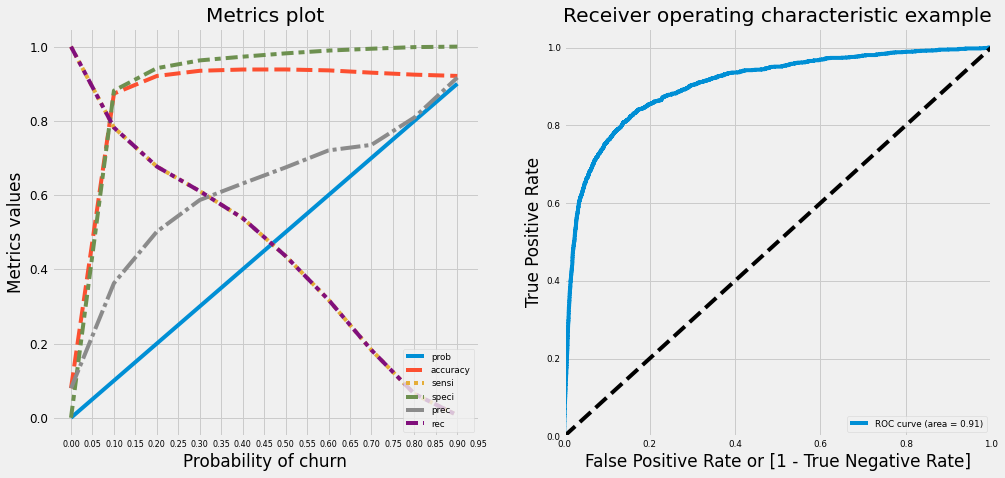

In [91]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_imbalanced, X_train_sm_imbalanced, y_train)

In [92]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.05 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87     19067
           1       0.25      0.86      0.39      1646

    accuracy                           0.78     20713
   macro avg       0.62      0.82      0.63     20713
weighted avg       0.93      0.78      0.83     20713

Accuracy Score   :  0.7825
Precision Score  :  0.2493
Recall Score     :  0.8639
F1 Score         :  0.3869
Area under curve :  0.8197 



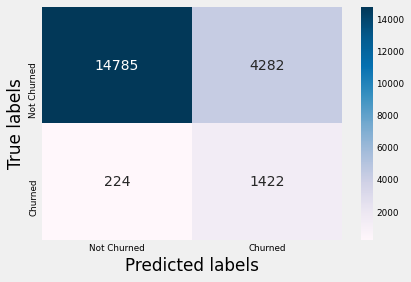

(0.7825, 0.2493, 0.8639, 0.3869, 0.8197)

In [93]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train, y_train_pred_final['final_predicted_1'])

In [94]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_imbalanced, 
                                                      X_test[imbalanced_rfe_features], 
                                                      y_test, cutoff=0.05) 
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0      0      0.012509                0
1      0      0.017375                0
2      0      0.082619                1
3      0      0.000922                0
4      0      0.045779                0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      8182
           1       0.25      0.86      0.39       696

    accuracy                           0.79      8878
   macro avg       0.62      0.82      0.63      8878
weighted avg       0.93      0.79      0.83      8878

Accuracy Score   :  0.7869
Precision Score  :  0.2504
Recall Score     :  0.8621
F1 Score         :  0.3881
Area under curve :  0.8213 



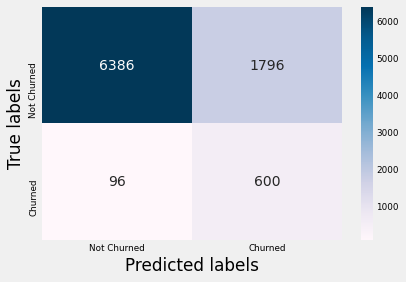

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213

In [95]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression on imbalanced data without PCA'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h6>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           Logistic Regression without PCA and handling imbalance using SMOTE technique
            </span>   
        </font>    
</h6>

In [96]:
# Step 1: Run RFE
smote_rfe_features = run_rfe_on_logistic(X_smote_samples, y_smote_samples, no_of_features=25)
X_train_rfe_smote = X_smote_samples[smote_rfe_features]
X_train_rfe_smote.shape

(38134, 25)

In [97]:
# Step 2: Build the logistic model using RFE selected columns with StatsModels 
logistic_model_smote, X_train_sm_smote = build_logistic_model(X_train_rfe_smote, y_smote_samples)
logistic_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13679.
Date:                Mon, 23 Aug 2021   Deviance:                       27358.
Time:                        18:30:08   Pearson chi2:                 4.63e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.1945      0.058     -3.373      0.001      -0.307      -0.081
night_pck_user_6                    -1.6799      0.275     -6.119      0.000      -2.218      -1.142
night_pck_user_7                    -1.1753      0.320     -3.667      0.000      -1.803      -0.547
night_pck_user_8                    -0.7500      0.347     -2.165      0.030      -1.429      -0.071
fb_user_6                           -1.0645      0.065    -16.319      0.000      -1.192      -0.937
fb_user_7                           -0.8286      0.065    -12.792      0.000      -0.956      -0.702
fb_user_8                           -0.8039      0.090     -8.949      0.000      -0.980      -0.628
arpu_action_phase                    0.1784      0.050      3.539      0.000       0.080       0.277
offnet_mou_action_phase             -0.2937      0.028    -10.566      0.000      -0.348      -0.239
roam_og_mou_action_phase             0.4358      0.015     29.270      0.000       0.407       0.465
loc_ic_mou_good_phase                0.3632      0.030     12.216      0.000       0.305       0.422
loc_ic_mou_action_phase             -1.3614      0.037    -36.683      0.000      -1.434      -1.289
spl_ic_mou_action_phase             -0.4246      0.026    -16.053      0.000      -0.476      -0.373
total_rech_amt_good_phase            0.5862      0.029     20.549      0.000       0.530       0.642
total_rech_amt_action_phase         -0.9404      0.056    -16.720      0.000      -1.051      -0.830
max_rech_amt_good_phase             -0.4920      0.028    -17.670      0.000      -0.547      -0.437
max_rech_amt_action_phase            0.3723      0.031     12.077      0.000       0.312       0.433
total_rech_data_action_phase         1.0502      0.087     12.076      0.000       0.880       1.221
max_rech_data_good_phase             0.9637      0.054     17.860      0.000       0.858       1.069
count_rech_3g_good_phase             0.6170      0.031     19.679      0.000       0.556       0.678
vol_2g_mb_good_phase                 0.5483      0.036     15.339      0.000       0.478       0.618
vol_2g_mb_action_phase              -0.3982      0.039    -10.300      0.000      -0.474      -0.322
sachet_2g_good_phase                 0.7244      0.049     14.710      0.000       0.628       0.821
sachet_2g_action_phase              -0.4645      0.052     -8.912      0.000      -0.567      -0.362
total_data_rech_amt_good_phase      -0.8903      0.078    -11.421      0.000      -1.043      -0.737
total_data_rech_amt_action_phase    -1.0888      0.088    -12.375      0.000      -1.261      -0.916
====================================================================================================
"""

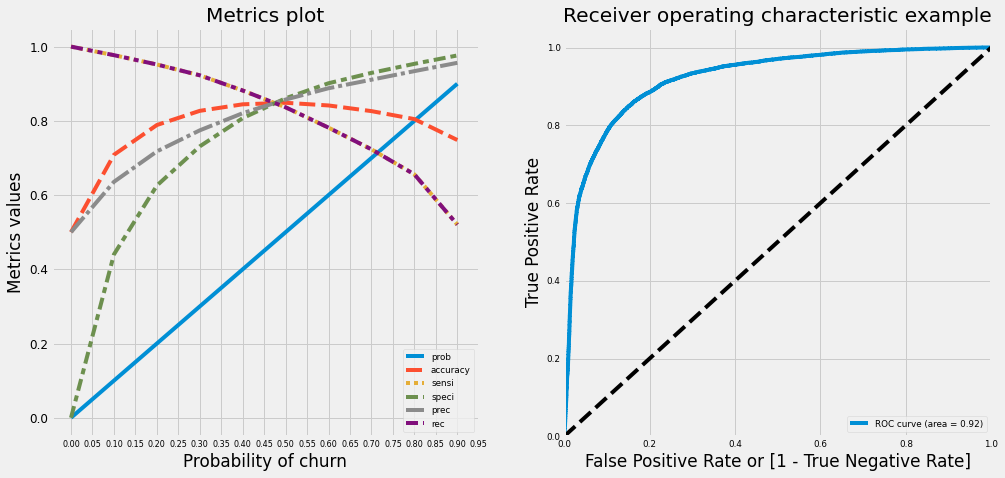

In [98]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_smote, X_train_sm_smote, y_smote_samples)

In [99]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.46
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns of all other cutoff

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85     19067
           1       0.84      0.86      0.85     19067

    accuracy                           0.85     38134
   macro avg       0.85      0.85      0.85     38134
weighted avg       0.85      0.85      0.85     38134

Accuracy Score   :  0.8485
Precision Score  :  0.8439
Recall Score     :  0.8552
F1 Score         :  0.8495
Area under curve :  0.8485 



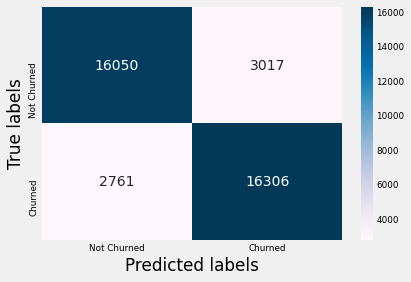

(0.8485, 0.8439, 0.8552, 0.8495, 0.8485)

In [100]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_smote_samples, y_train_pred_final['final_predicted_1'])

In [101]:
# Step 6: Predict on the test dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_smote, X_test[smote_rfe_features], y_test, cutoff=0.46) # Selecting only the columns used in final model of Train Dataset
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0      0      0.162346                0
1      0      0.241931                0
2      0      0.653492                1
3      0      0.021398                0
4      0      0.166885                0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8182
           1       0.31      0.82      0.45       696

    accuracy                           0.84      8878
   macro avg       0.65      0.83      0.68      8878
weighted avg       0.93      0.84      0.87      8878

Accuracy Score   :  0.8429
Precision Score  :  0.3108
Recall Score     :  0.8247
F1 Score         :  0.4514
Area under curve :  0.8346 



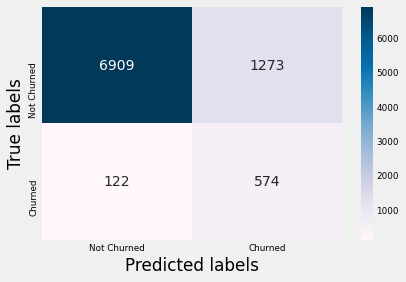

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346

In [102]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with SMOTE & without PCA'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results


<div>
    <span style='font-family:Georgia'> 
        <h3><font color = blue> PCA </font></h3> 
        <b> STEPS : </b><br>
        <ol>
            <li> Perform PCA on the whole training dataset to identify number of features </li>
            <li> Create 25 Principal components covering 90% of the data.</li>
            <li> Predict using the training data</li>
            <li> Decide the probability cutoff to decide if a customer has churned or not</li>
            <li> Evaluate the metrics on the training data prediction</li>
            <li> Predict using the test data and the decided cutoff </li>
            <li> Evaluate the metrics on the test data prediction</li>
        </ol>
    </span>
</div>

In [103]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (10,6))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [104]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print("Shape of X train PCA : ", X_train_pca.shape)
    print("Shape of Y train PCA : ", y_train.shape)
    print("Shape of X test PCA : ", X_test_pca.shape)
    print("Shape of Y test PCA : ", y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (10,8))
    sns.heatmap(corrmat, annot = False,cmap="RdYlGn",linewidth =1)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    
    return X_train_pca, X_test_pca

<h6>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           Logistic Regression with PCA and handling imbalance using random over sampling technique
            </span>   
        </font>    
</h6>

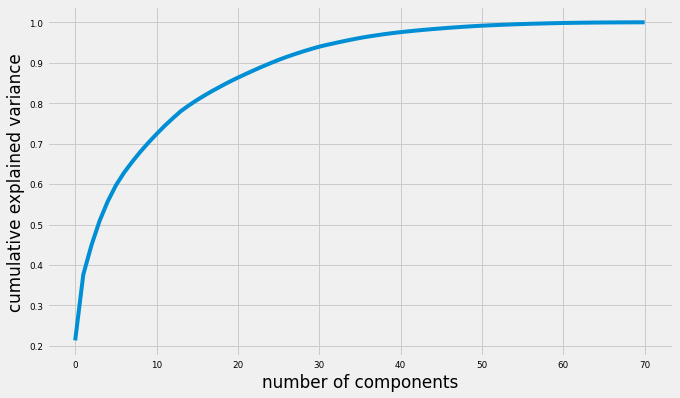

In [105]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_r_over_sampled)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            Looks like less than 25 components are enough to describe 90% of the variance in the dataset. Let's choose 25 components for modeling. 
    </span>    
</div>

Shape of X train PCA :  (38134, 25)
Shape of Y train PCA :  (38134, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


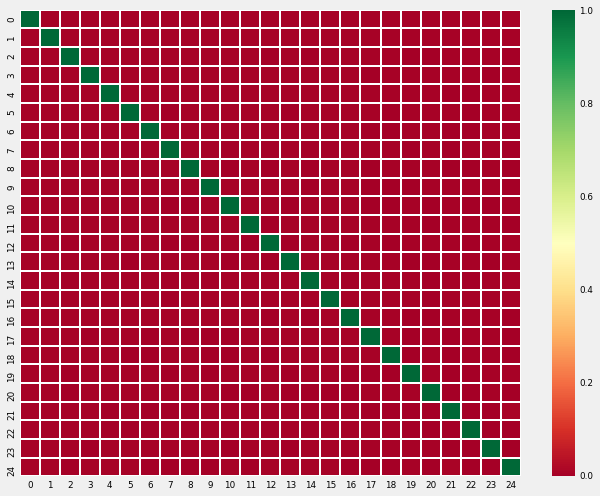

max corr: 0.004480855100985378 , min corr:  -0.004189747952203984


In [106]:
# Step 1.2 : Create 25 Principal components
X_train_pca_ro, X_test_pca_ro = perform_incremental_PCA(X_r_over_sampled, y_r_over_sampled, 25)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            There is no correlation between any two components which is good for proceeding 
    </span>    
</div>

In [107]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced = build_logistic_model(X_train_pca_ro, y_r_over_sampled.values.ravel())
logistic_model_pca_r_over_balanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14971.
Date:                Mon, 23 Aug 2021   Deviance:                       29943.
Time:                        18:30:16   Pearson chi2:                 4.63e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.016      2.840      0.005       0.014       0.075
0             -0.3362      0.004    -78.341      0.000      -0.345      -0.328
1             -0.4622      0.005    -84.083      0.000      -0.473      -0.451
2              0.1707      0.007     26.143      0.000       0.158       0.183
3              0.1031      0.007     14.060      0.000       0.089       0.118
4              0.4777      0.009     50.424      0.000       0.459       0.496
5             -0.0237      0.009     -2.730      0.006      -0.041      -0.007
6              0.2202      0.010     21.949      0.000       0.200       0.240
7             -0.0558      0.011     -5.039      0.000      -0.078      -0.034
8             -0.1331      0.012    -11.353      0.000      -0.156      -0.110
9             -0.1569      0.012    -13.328      0.000      -0.180      -0.134
10            -0.0321      0.012     -2.610      0.009      -0.056      -0.008
11            -0.3636      0.013    -27.755      0.000      -0.389      -0.338
12            -0.0237      0.013     -1.779      0.075      -0.050       0.002
13            -0.1003      0.014     -7.234      0.000      -0.127      -0.073
14             0.0007      0.015      0.048      0.962      -0.029       0.030
15             0.0008      0.015      0.053      0.958      -0.029       0.030
16            -0.0669      0.016     -4.096      0.000      -0.099      -0.035
17             0.0301      0.017      1.766      0.077      -0.003       0.063
18             0.1186      0.018      6.755      0.000       0.084       0.153
19             0.0380      0.018      2.063      0.039       0.002       0.074
20            -0.0749      0.018     -4.066      0.000      -0.111      -0.039
21            -0.1139      0.019     -5.947      0.000      -0.151      -0.076
22            -0.0927      0.019     -4.869      0.000      -0.130      -0.055
23            -0.3198      0.023    -13.747      0.000      -0.365      -0.274
24             0.0291      0.021      1.371      0.170      -0.012       0.071
==============================================================================
"""

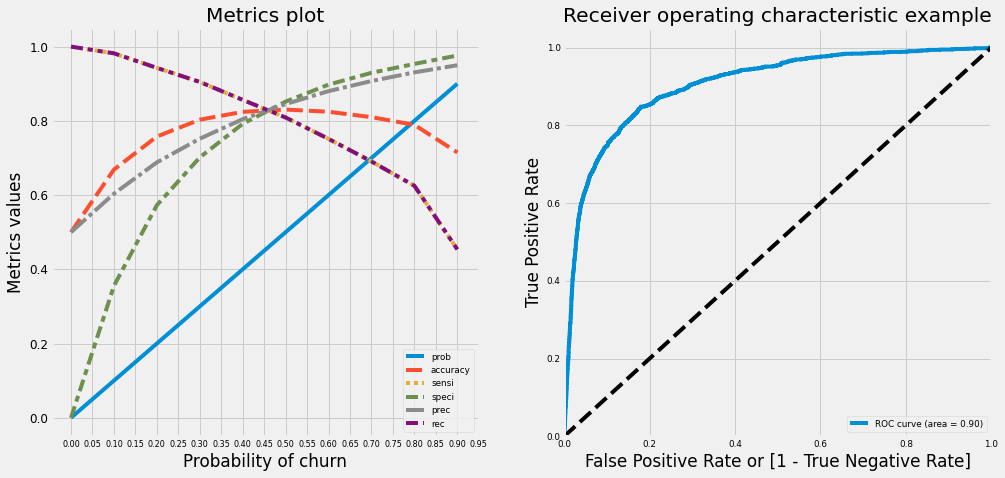

In [108]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced, y_r_over_sampled)

In [109]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns of all other cutoff

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     19067
           1       0.83      0.84      0.83     19067

    accuracy                           0.83     38134
   macro avg       0.83      0.83      0.83     38134
weighted avg       0.83      0.83      0.83     38134

Accuracy Score   :  0.833
Precision Score  :  0.8274
Recall Score     :  0.8416
F1 Score         :  0.8345
Area under curve :  0.833 



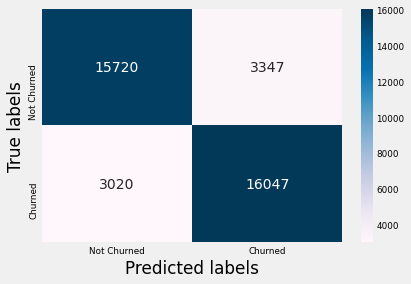

(0.833, 0.8274, 0.8416, 0.8345, 0.833)

In [110]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_r_over_sampled, y_train_pred_final['final_predicted_1'])

In [111]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_r_over_balanced, X_test_pca_ro, y_test, cutoff=0.45) 
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0      0      0.091873                0
1      0      0.096463                0
2      0      0.274017                0
3      0      0.024216                0
4      0      0.277401                0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8182
           1       0.30      0.84      0.44       696

    accuracy                           0.83      8878
   macro avg       0.64      0.83      0.67      8878
weighted avg       0.93      0.83      0.86      8878

Accuracy Score   :  0.8316
Precision Score  :  0.2967
Recall Score     :  0.8376
F1 Score         :  0.4382
Area under curve :  0.8344 



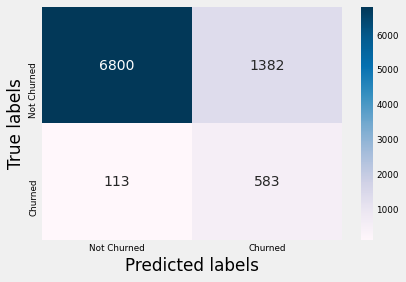

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344

In [112]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & Random over sampling'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h6>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           Logistic Regression with PCA and handling imbalance using random under sampling technique 
            </span>   
        </font>    
</h6>

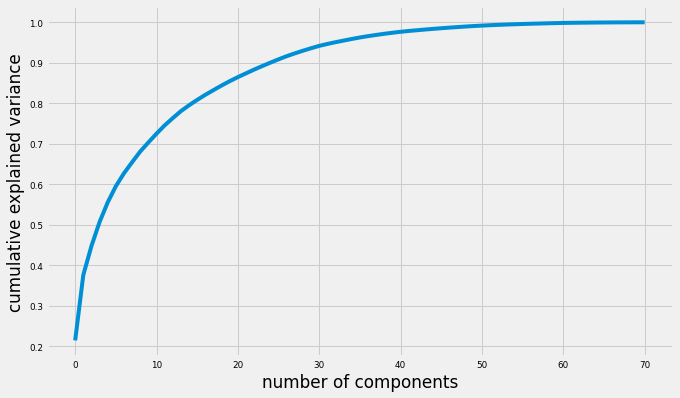

In [113]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_r_under_sampled)

Shape of X train PCA :  (3292, 25)
Shape of Y train PCA :  (3292, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


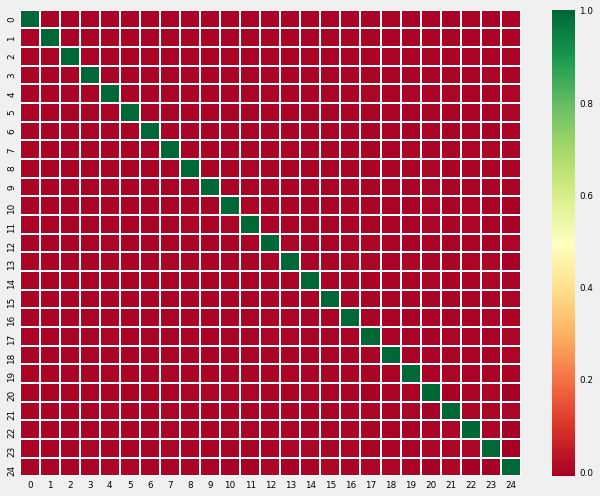

max corr: 0.004868570151314424 , min corr:  -0.010900699274422429


In [114]:
X_train_pca_ru, X_test_pca_run = perform_incremental_PCA(X_r_under_sampled, y_r_under_sampled, 25)

In [115]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_under_sampled, X_train_sm_pca_under_sampled = build_logistic_model(X_train_pca_ru, y_r_under_sampled.values.ravel())
# Skip as the features are PCA uninterpretable components
# logistic_model_pca_under_sampled.summary() 

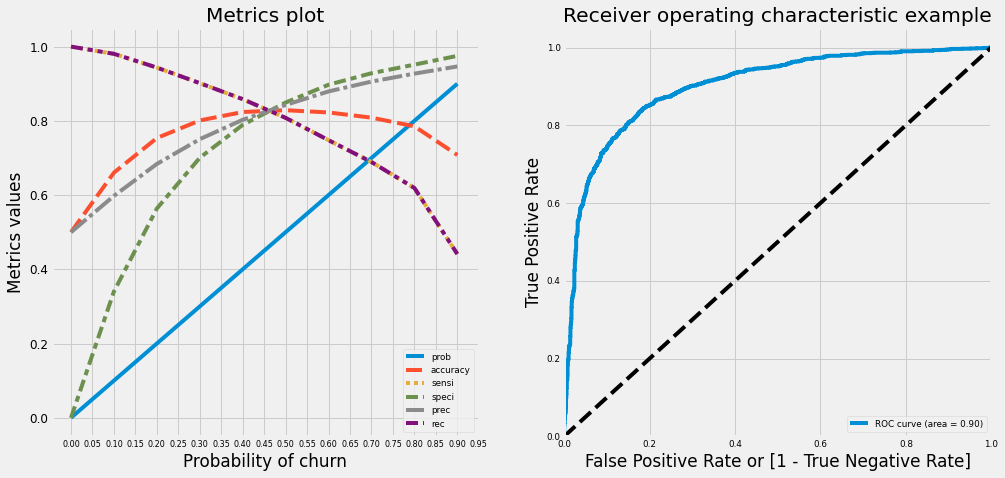

In [116]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_under_sampled, X_train_sm_pca_under_sampled, y_r_under_sampled)

In [117]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1646
           1       0.82      0.84      0.83      1646

    accuracy                           0.83      3292
   macro avg       0.83      0.83      0.83      3292
weighted avg       0.83      0.83      0.83      3292

Accuracy Score   :  0.8284
Precision Score  :  0.8227
Recall Score     :  0.8372
F1 Score         :  0.8299
Area under curve :  0.8284 



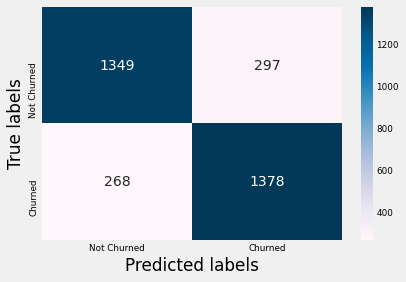

(0.8284, 0.8227, 0.8372, 0.8299, 0.8284)

In [118]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_r_under_sampled, y_train_pred_final['final_predicted_1'])

In [119]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_under_sampled, X_test_pca_run, y_test, cutoff=0.45) 
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0      0      0.129756                0
1      0      0.094651                0
2      0      0.246063                0
3      0      0.029257                0
4      0      0.304609                0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8182
           1       0.30      0.84      0.44       696

    accuracy                           0.83      8878
   macro avg       0.64      0.83      0.67      8878
weighted avg       0.93      0.83      0.86      8878

Accuracy Score   :  0.8313
Precision Score  :  0.296
Recall Score     :  0.8362
F1 Score         :  0.4373
Area under curve :  0.8335 



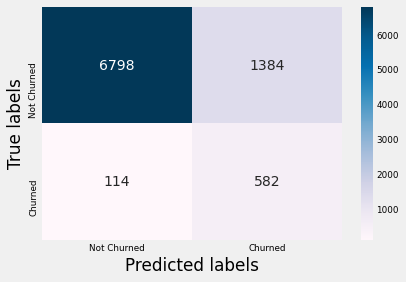

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335

In [120]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & Random under sampling'],
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h6>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           Logistic Regression with PCA and handling imbalance using SMOTE technique 
            </span>   
        </font>    
</h6>

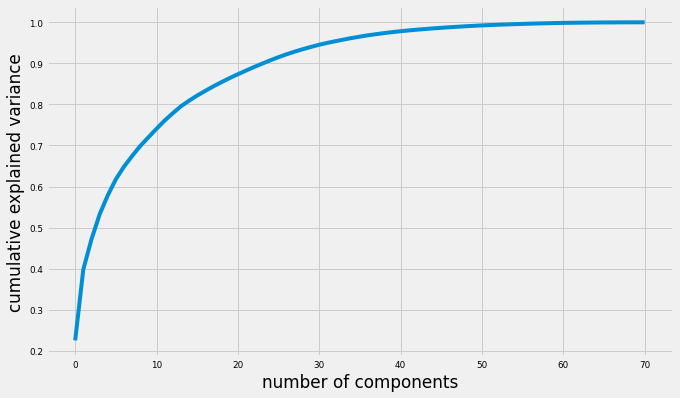

In [121]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_smote_samples)

<div>
    <span style='font-family:Georgia'>
        Looks like less than 25 components are enough to describe 90% of the variance in the dataset. Let's choose 25 components for modeling.
    </span>
</div>

In [122]:
X_train.shape

(20713, 71)

Shape of X train PCA :  (38134, 25)
Shape of Y train PCA :  (38134, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


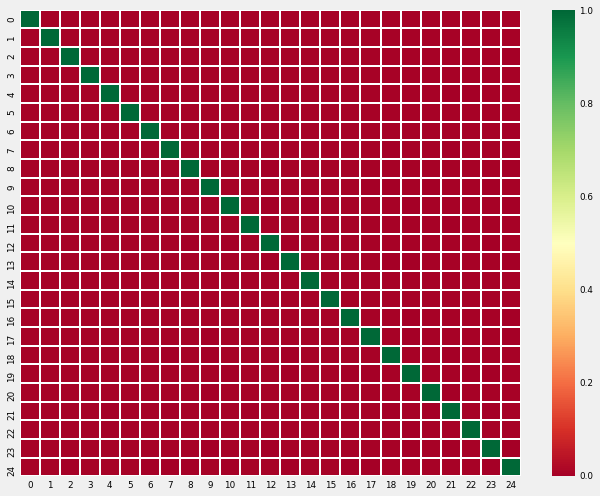

max corr: 0.0027263132926855205 , min corr:  -0.004450984375627002


In [123]:
# Step 1.2 : Create 25 Principal components
X_train_pca_smote, X_test_pca_smote = perform_incremental_PCA(X_smote_samples, y_smote_samples, 25)

- There is no correlation between any two components which is good for proceeding

In [124]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_smote, X_train_sm_pca_smote = build_logistic_model(X_train_pca_smote, y_smote_samples.values.ravel())
# Skip as the features are PCA uninterpretable components
logistic_model_pca_smote.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14248.
Date:                Mon, 23 Aug 2021   Deviance:                       28496.
Time:                        18:30:26   Pearson chi2:                 4.51e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.016      0.397      0.691      -0.026       0.039
0             -0.3743      0.005    -81.648      0.000      -0.383      -0.365
1             -0.5008      0.006    -85.754      0.000      -0.512      -0.489
2              0.1682      0.007     24.391      0.000       0.155       0.182
3              0.0675      0.008      8.676      0.000       0.052       0.083
4              0.4554      0.010     44.809      0.000       0.436       0.475
5             -0.0848      0.009     -9.170      0.000      -0.103      -0.067
6              0.2144      0.011     19.793      0.000       0.193       0.236
7             -0.0021      0.012     -0.166      0.868      -0.026       0.022
8             -0.1542      0.013    -12.213      0.000      -0.179      -0.129
9             -0.2017      0.014    -14.761      0.000      -0.228      -0.175
10            -0.1698      0.013    -13.113      0.000      -0.195      -0.144
11             0.4057      0.014     28.799      0.000       0.378       0.433
12            -0.0463      0.015     -3.182      0.001      -0.075      -0.018
13            -0.1059      0.015     -6.918      0.000      -0.136      -0.076
14            -0.0104      0.016     -0.632      0.528      -0.043       0.022
15            -0.0314      0.016     -1.928      0.054      -0.063       0.001
16            -0.1039      0.018     -5.748      0.000      -0.139      -0.068
17             0.0124      0.019      0.660      0.509      -0.024       0.049
18             0.1241      0.021      5.919      0.000       0.083       0.165
19            -0.1557      0.019     -8.179      0.000      -0.193      -0.118
20            -0.1493      0.021     -7.206      0.000      -0.190      -0.109
21            -0.2324      0.022    -10.611      0.000      -0.275      -0.189
22            -0.0229      0.021     -1.083      0.279      -0.064       0.019
23            -0.3268      0.025    -13.021      0.000      -0.376      -0.278
24             0.0602      0.023      2.568      0.010       0.014       0.106
==============================================================================
"""

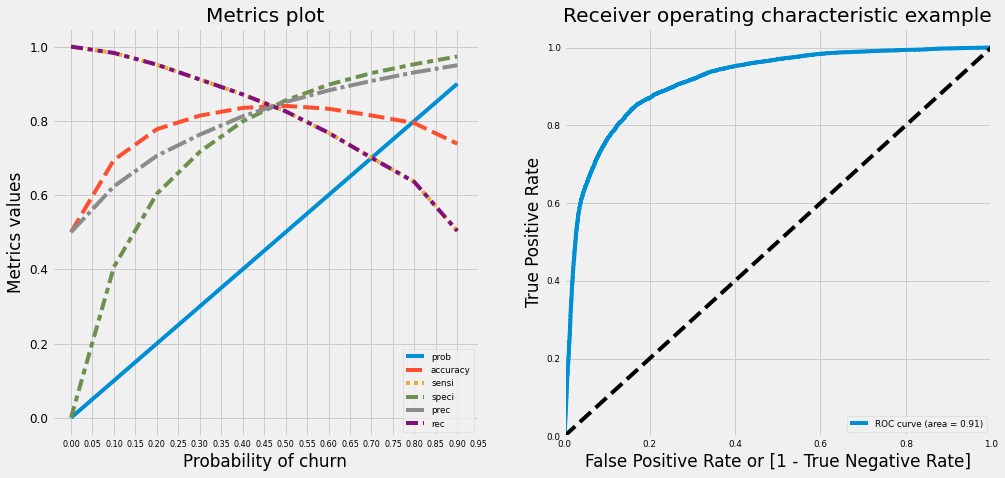

In [125]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_smote, X_train_sm_pca_smote, y_smote_samples)

In [126]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     19067
           1       0.83      0.85      0.84     19067

    accuracy                           0.84     38134
   macro avg       0.84      0.84      0.84     38134
weighted avg       0.84      0.84      0.84     38134

Accuracy Score   :  0.8413
Precision Score  :  0.8336
Recall Score     :  0.8527
F1 Score         :  0.8431
Area under curve :  0.8413 



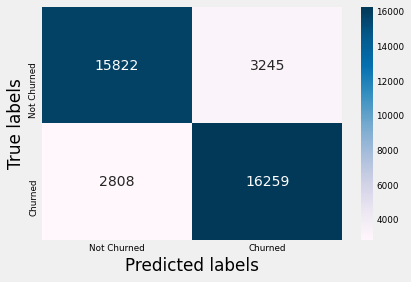

(0.8413, 0.8336, 0.8527, 0.8431, 0.8413)

In [127]:
#  Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_smote_samples, y_train_pred_final['final_predicted_1'])

In [128]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_smote, X_test_pca_smote, y_test, cutoff=0.45) 
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0      0      0.065502                0
1      0      0.079804                0
2      0      0.289324                0
3      0      0.014234                0
4      0      0.242473                0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      8182
           1       0.30      0.83      0.44       696

    accuracy                           0.84      8878
   macro avg       0.64      0.83      0.67      8878
weighted avg       0.93      0.84      0.87      8878

Accuracy Score   :  0.8361
Precision Score  :  0.302
Recall Score     :  0.8319
F1 Score         :  0.4432
Area under curve :  0.8342 



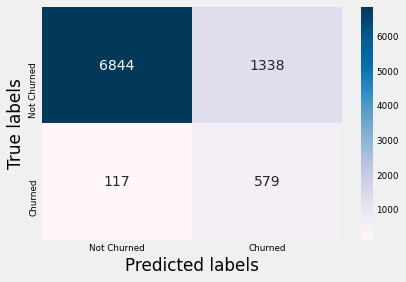

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342

In [129]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & SMOTE'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall],
                            'F1 score': [f1],
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h6>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           Logistic Regression with PCA and handling imbalance using SMOTEEN technique 
            </span>   
        </font>    
</h6>

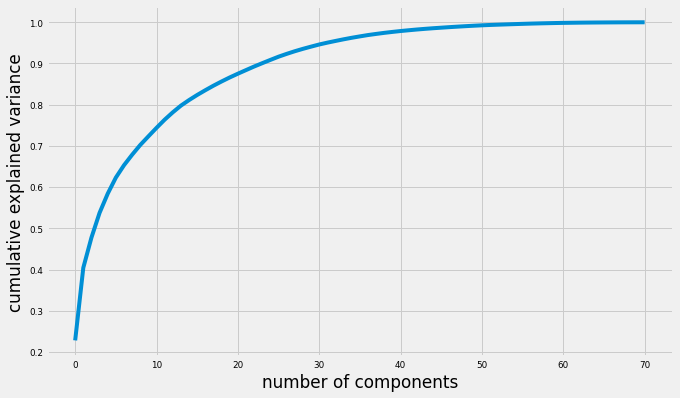

In [130]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_train_resampled)

<div>
    <span style='font-family:Georgia'>
Looks like less than 25 components are enough to describe 90% of the variance in the dataset. Let's choose 25 components for modeling.
    </span>
</div>

Shape of X train PCA :  (34146, 25)
Shape of Y train PCA :  (34146, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


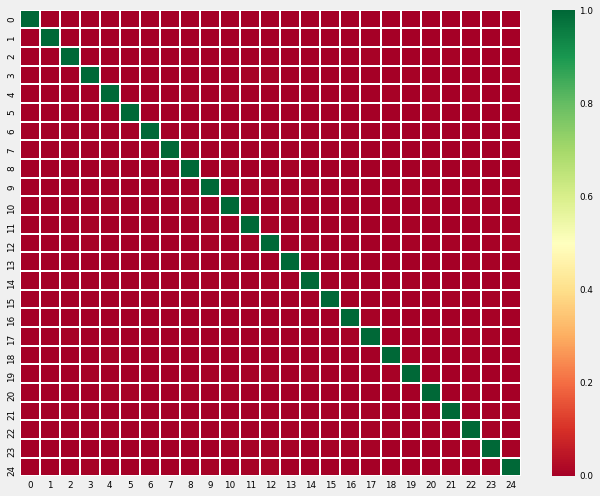

max corr: 0.004845881463481046 , min corr:  -0.00333298032030609


In [131]:
# Step 1.2 : Create 25 Principal components
X_train_pca_smoteen, X_test_pca_smoteen = perform_incremental_PCA(X_train_resampled, y_train_resampled, 25)

In [132]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_smoteen, X_train_sm_pca_smoteen = build_logistic_model(X_train_pca_smoteen, y_train_resampled.values.ravel())
# Skip as the features are PCA uninterpretable components
logistic_model_pca_smoteen.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                34146
Model:                            GLM   Df Residuals:                    34120
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9348.1
Date:                Mon, 23 Aug 2021   Deviance:                       18696.
Time:                        18:30:32   Pearson chi2:                 4.39e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7696      0.024     31.594      0.000       0.722       0.817
0             -0.5852      0.007    -78.085      0.000      -0.600      -0.570
1             -0.6507      0.009    -75.793      0.000      -0.667      -0.634
2              0.2606      0.009     29.706      0.000       0.243       0.278
3              0.1160      0.010     11.389      0.000       0.096       0.136
4              0.6900      0.015     46.977      0.000       0.661       0.719
5             -0.0367      0.011     -3.255      0.001      -0.059      -0.015
6              0.2885      0.013     22.348      0.000       0.263       0.314
7              0.0545      0.015      3.573      0.000       0.025       0.084
8             -0.1925      0.016    -11.730      0.000      -0.225      -0.160
9             -0.3209      0.017    -19.280      0.000      -0.354      -0.288
10            -0.2661      0.016    -16.509      0.000      -0.298      -0.234
11             0.5597      0.018     30.475      0.000       0.524       0.596
12            -0.0613      0.017     -3.514      0.000      -0.096      -0.027
13            -0.0854      0.018     -4.750      0.000      -0.121      -0.050
14            -0.0132      0.020     -0.673      0.501      -0.052       0.025
15             0.0093      0.020      0.469      0.639      -0.029       0.048
16            -0.1103      0.021     -5.150      0.000      -0.152      -0.068
17             0.0557      0.022      2.507      0.012       0.012       0.099
18             0.2055      0.023      8.886      0.000       0.160       0.251
19            -0.2066      0.023     -8.896      0.000      -0.252      -0.161
20            -0.2099      0.025     -8.493      0.000      -0.258      -0.161
21            -0.3370      0.027    -12.434      0.000      -0.390      -0.284
22            -0.3069      0.027    -11.370      0.000      -0.360      -0.254
23             0.0075      0.026      0.282      0.778      -0.044       0.059
24             0.0194      0.028      0.695      0.487      -0.035       0.074
==============================================================================
"""

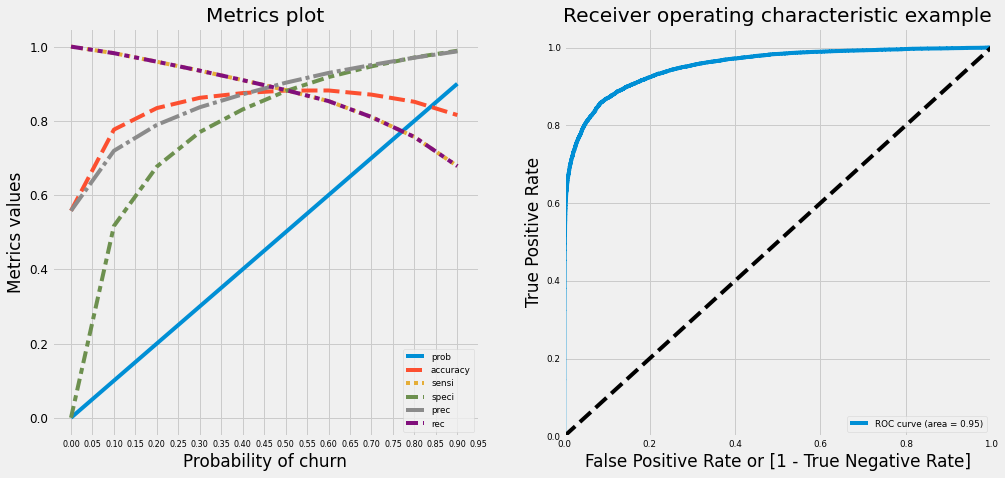

In [133]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_smoteen, X_train_sm_pca_smoteen, y_train_resampled)

In [134]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.46
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     15103
           1       0.89      0.89      0.89     19043

    accuracy                           0.88     34146
   macro avg       0.88      0.88      0.88     34146
weighted avg       0.88      0.88      0.88     34146

Accuracy Score   :  0.8796
Precision Score  :  0.8911
Recall Score     :  0.8932
F1 Score         :  0.8922
Area under curve :  0.8778 



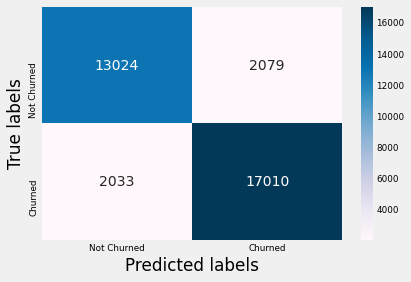

(0.8796, 0.8911, 0.8932, 0.8922, 0.8778)

In [135]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train_resampled, y_train_pred_final['final_predicted_1'])

In [136]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_smoteen, X_test_pca_smoteen, y_test, cutoff=0.46) 
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0      0      0.050456                0
1      0      0.057353                0
2      0      0.371617                0
3      0      0.008758                0
4      0      0.283330                0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      8182
           1       0.25      0.88      0.39       696

    accuracy                           0.78      8878
   macro avg       0.62      0.83      0.63      8878
weighted avg       0.93      0.78      0.83      8878

Accuracy Score   :  0.7842
Precision Score  :  0.2506
Recall Score     :  0.8807
F1 Score         :  0.3902
Area under curve :  0.8284 



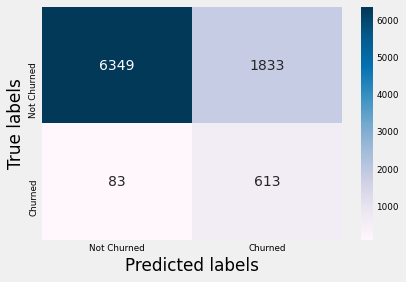

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284

In [137]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & SMOTEENN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h4>   Support Vector Machine (SVM) </h4>

In [138]:
# We we create a new model for SVM with hyperparameter tuning process selected best parameters 
#best parameters : 'C' : 0.1 'gamma':0.5
model_svm = SVC(C = 0.1,gamma = 0.5,kernel = 'linear', probability = True, random_state = 100)
model_svm.fit(X_train_resampled,y_train_resampled)

SVC(C=0.1, gamma=0.5, kernel='linear', probability=True, random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     19067
           1       0.29      0.87      0.43      1646

    accuracy                           0.82     20713
   macro avg       0.64      0.84      0.66     20713
weighted avg       0.93      0.82      0.86     20713

Accuracy Score   :  0.8186
Precision Score  :  0.2872
Recall Score     :  0.8657
F1 Score         :  0.4313
Area under curve :  0.8401 



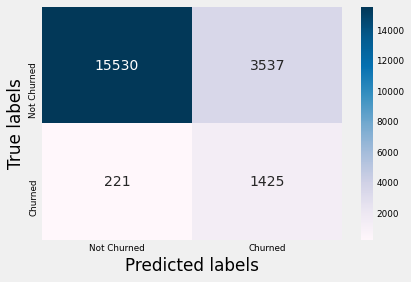

(0.8186, 0.2872, 0.8657, 0.4313, 0.8401)

In [139]:
# Checking the performance on the train dataset
y_train_svm = model_svm.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_svm)

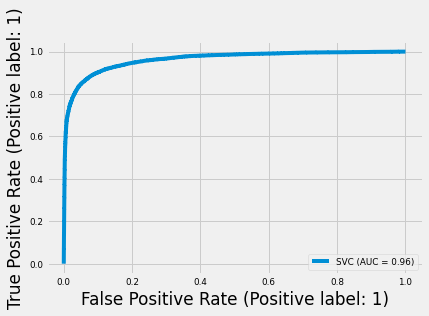

In [140]:
#Checking the AUC ROC Curve
plot_roc_curve(model_svm, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      8182
           1       0.29      0.86      0.44       696

    accuracy                           0.83      8878
   macro avg       0.64      0.84      0.67      8878
weighted avg       0.93      0.83      0.86      8878

Accuracy Score   :  0.8251
Precision Score  :  0.2921
Recall Score     :  0.8649
F1 Score         :  0.4367
Area under curve :  0.8433 



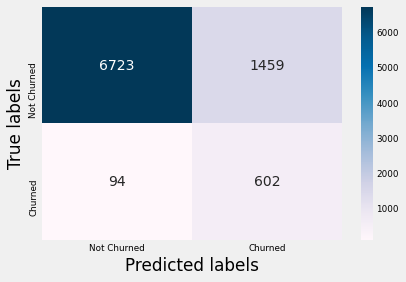

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433

In [141]:
# Evaluate the metrics on the test data set

y_test_svm = model_svm.predict(X_test)
print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_svm)

tempResults = pd.DataFrame({'Model':['SVM with SMOTEENN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h4>    Random Forest</h4>

<div>
    <span style='font-family:Georgia'>
        Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample. Both bagging and random forests have proven effective on a wide range of different predictive modeling problems.Although effective, they are not suited to classification problems with a skewed class distribution. We will two approach with RandomForest. First method is by using class_weight based on imbalance data. Second is to use resampled data using SMOTEENN technique. 
    </span>
</div>

In [142]:
#  Running RandomForestClassifier without hyper parameter tuning with the actual train and test data data
model_rf = RandomForestClassifier(random_state = 100, n_estimators= 100,n_jobs =-1, class_weight = {0:1,1:9})
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 9}, n_jobs=-1, random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19067
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     20713
   macro avg       1.00      1.00      1.00     20713
weighted avg       1.00      1.00      1.00     20713

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
F1 Score         :  1.0
Area under curve :  1.0 



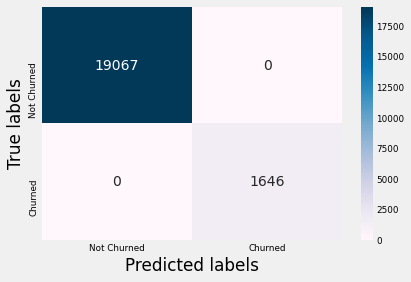

(1.0, 1.0, 1.0, 1.0, 1.0)

In [143]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

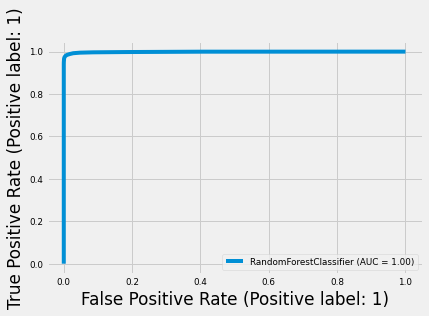

In [144]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8182
           1       0.79      0.43      0.56       696

    accuracy                           0.95      8878
   macro avg       0.87      0.71      0.76      8878
weighted avg       0.94      0.95      0.94      8878

Accuracy Score   :  0.9464
Precision Score  :  0.7895
Recall Score     :  0.431
F1 Score         :  0.5576
Area under curve :  0.7106 



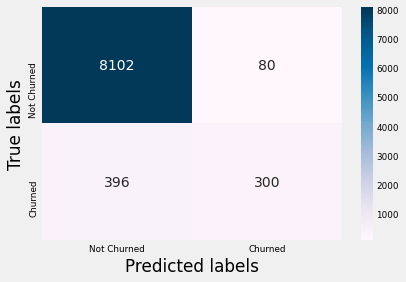

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   
0                    Random Forest with class_weight    0.9464     0.7895   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433  
0  0.4310    0.5576                0.7106

In [145]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with class_weight'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            In the class-weight method of RandomForest, the train dataset recall score is 1 where as in test data set it is 0.42. This signifies, that the model is over-trained. We need to conduct hyperparameter tuning to get better result. But before we do hyperparameter tuning, we will try another model with resampled data and without specifying class_weight.  
    </span>    
</div>

In [146]:
# Running RandomForestClassifier without hyper parameter tuning with the resampled data
model_rf = RandomForestClassifier(random_state = 100, n_estimators= 100,n_jobs =-1)
model_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     19067
           1       0.55      1.00      0.71      1646

    accuracy                           0.94     20713
   macro avg       0.78      0.96      0.84     20713
weighted avg       0.96      0.94      0.94     20713

Accuracy Score   :  0.9361
Precision Score  :  0.5545
Recall Score     :  0.9982
F1 Score         :  0.713
Area under curve :  0.9645 



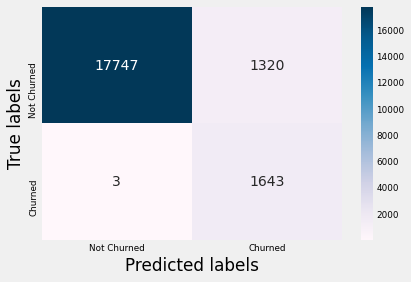

(0.9361, 0.5545, 0.9982, 0.713, 0.9645)

In [147]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

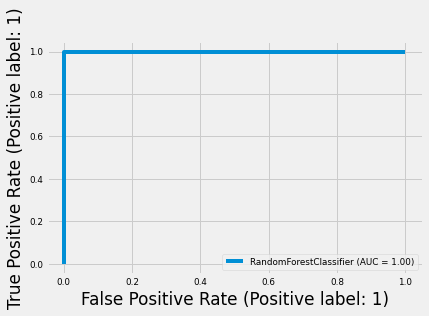

In [148]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      8182
           1       0.46      0.75      0.57       696

    accuracy                           0.91      8878
   macro avg       0.72      0.84      0.76      8878
weighted avg       0.94      0.91      0.92      8878

Accuracy Score   :  0.9102
Precision Score  :  0.4559
Recall Score     :  0.75
F1 Score         :  0.5671
Area under curve :  0.8369 



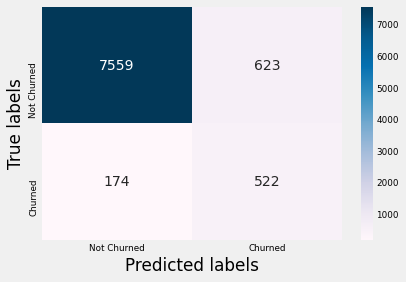

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   
0                    Random Forest with class_weight    0.9464     0.7895   
0                        Random Forest with SMOTEENN    0.9102     0.4559   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433  
0  0.4310    0.5576                0.7106  
0  0.7500    0.5671                0.8369

In [149]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)
print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with SMOTEENN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            With resampling, the model performance has slightly improved where test dataset recall is 0.75. But this is still not sufficient. Next we will do hyper parameter tuning and build a model with best parameters from GridSearchCV.  
    </span>    
</div>

In [150]:
# Let's build the model using the hyperparameters we got from GridSearchCV
model_rf = RandomForestClassifier(random_state = 100, n_jobs =-1,
                                  n_estimators= 500,
                                  max_depth = 30,
                                  max_features = 'auto',
                                  min_samples_leaf = 100,
                                  min_samples_split=200,
                                  criterion ='gini')
model_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=500, n_jobs=-1,
                       random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     19067
           1       0.34      0.86      0.49      1646

    accuracy                           0.86     20713
   macro avg       0.67      0.86      0.70     20713
weighted avg       0.93      0.86      0.88     20713

Accuracy Score   :  0.859
Precision Score  :  0.3445
Recall Score     :  0.8578
F1 Score         :  0.4916
Area under curve :  0.8585 



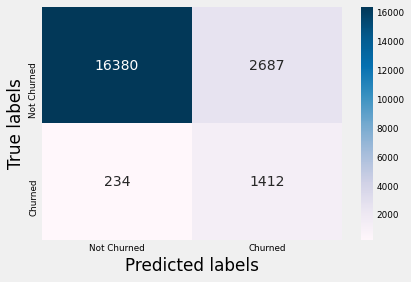

(0.859, 0.3445, 0.8578, 0.4916, 0.8585)

In [151]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

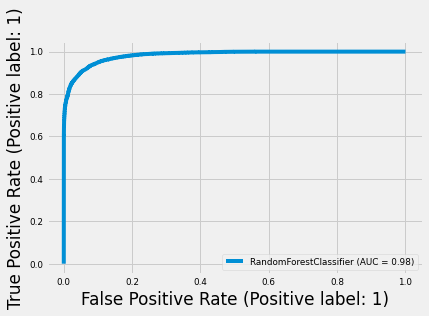

In [152]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.83      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.85      0.70      8878
weighted avg       0.93      0.86      0.89      8878

Accuracy Score   :  0.8612
Precision Score  :  0.3412
Recall Score     :  0.8276
F1 Score         :  0.4832
Area under curve :  0.8458 



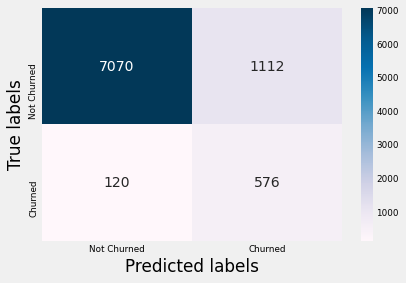

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   
0                    Random Forest with class_weight    0.9464     0.7895   
0                        Random Forest with SMOTEENN    0.9102     0.4559   
0  Random Forest with SMOTEENN & Hyperparameter t...    0.8612     0.3412   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433  
0  0.4310    0.5576                0.7106  
0  0.7500    0.5671                0.8369  
0  0.8276    0.4832                0.8458

In [153]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            This is significant improvement from other RF models or the SVM Model. Let's check if we can get better results with boosting models or not.  
    </span>    
</div>

<h4>AdaBoost</h4>

In [154]:
model_ada = AdaBoostClassifier(learning_rate=0.05,n_estimators = 500)
model_ada.fit(X_train_resampled,y_train_resampled)

AdaBoostClassifier(learning_rate=0.05, n_estimators=500)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     19067
           1       0.31      0.84      0.45      1646

    accuracy                           0.84     20713
   macro avg       0.64      0.84      0.68     20713
weighted avg       0.93      0.84      0.87     20713

Accuracy Score   :  0.8353
Precision Score  :  0.3056
Recall Score     :  0.8433
F1 Score         :  0.4486
Area under curve :  0.8389 



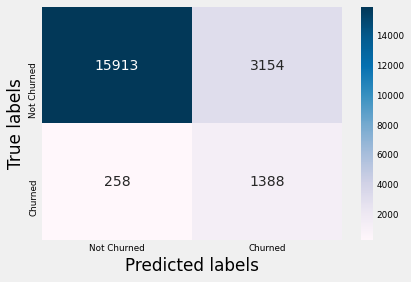

(0.8353, 0.3056, 0.8433, 0.4486, 0.8389)

In [155]:
# Checking the performance of the train dataset
y_train_ada = model_ada.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_ada)

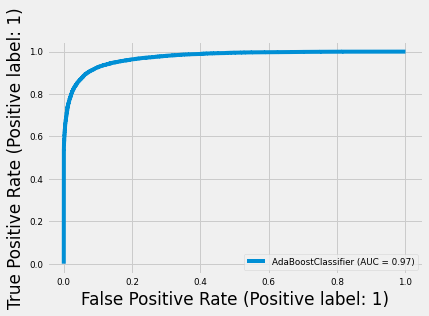

In [156]:
#Checking the AUC ROC Curve
plot_roc_curve(model_ada, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8182
           1       0.31      0.84      0.45       696

    accuracy                           0.84      8878
   macro avg       0.65      0.84      0.68      8878
weighted avg       0.93      0.84      0.87      8878

Accuracy Score   :  0.8388
Precision Score  :  0.3073
Recall Score     :  0.842
F1 Score         :  0.4502
Area under curve :  0.8403 



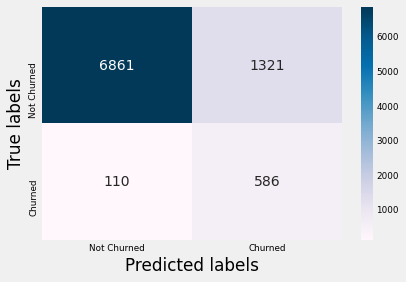

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   
0                    Random Forest with class_weight    0.9464     0.7895   
0                        Random Forest with SMOTEENN    0.9102     0.4559   
0  Random Forest with SMOTEENN & Hyperparameter t...    0.8612     0.3412   
0      AdaBoost with SMOTEENN & Hyperparameter tuned    0.8388     0.3073   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433  
0  0.4310    0.5576                0.7106  
0  0.7500    0.5671                0.8369  
0  0.8276    0.4832                0.8458  
0  0.8420    0.4502                0.8403

In [157]:
# Checking the performance on the test dataset
y_test_ada = model_ada.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_ada)

tempResults = pd.DataFrame({'Model':['AdaBoost with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h6>XGBoost</h6>

In [158]:
model_xgb = XGBClassifier(learning_rate=0.01, 
                          n_estimators=300, 
                          max_depth=4, 
                          min_child_weight=10, 
                          gamma=0.6,
                          nthread=4, 
                          subsample=0.4,
                          colsample_bytree=0.6,
                          reg_alpha=10,
                          reg_lambda=2)
model_xgb.fit(X_train_resampled,y_train_resampled)

[18:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=10, reg_lambda=2, scale_pos_weight=1,
              subsample=0.4, tree_method='exact', validate_parameters=1,
              verbosity=None)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19067
           1       0.33      0.84      0.48      1646

    accuracy                           0.85     20713
   macro avg       0.66      0.85      0.70     20713
weighted avg       0.93      0.85      0.88     20713

Accuracy Score   :  0.8535
Precision Score  :  0.3334
Recall Score     :  0.8445
F1 Score         :  0.4781
Area under curve :  0.8494 



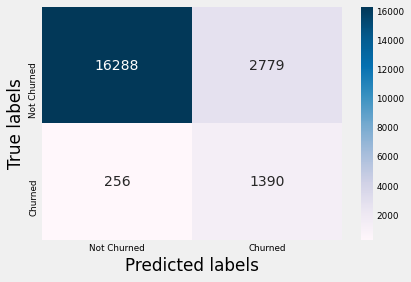

(0.8535, 0.3334, 0.8445, 0.4781, 0.8494)

In [159]:
# Checking the performance of the train dataset
y_train_xgb = model_xgb.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_xgb)

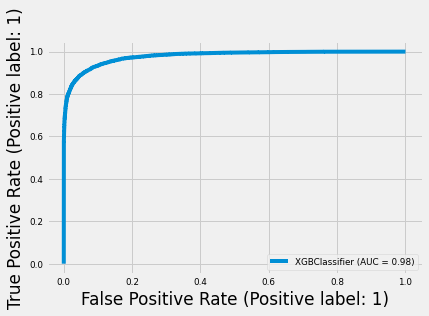

In [160]:
#Checking the AUC ROC Curve
plot_roc_curve(model_xgb, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.83      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.85      0.70      8878
weighted avg       0.93      0.86      0.88      8878

Accuracy Score   :  0.8601
Precision Score  :  0.3402
Recall Score     :  0.8348
F1 Score         :  0.4834
Area under curve :  0.8485 



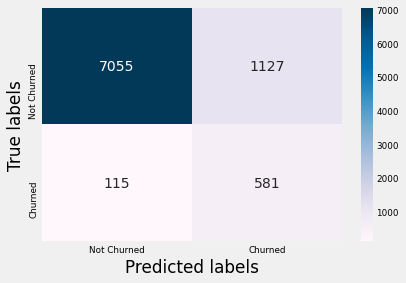

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   
0                    Random Forest with class_weight    0.9464     0.7895   
0                        Random Forest with SMOTEENN    0.9102     0.4559   
0  Random Forest with SMOTEENN & Hyperparameter t...    0.8612     0.3412   
0      AdaBoost with SMOTEENN & Hyperparameter tuned    0.8388     0.3073   
0       XGBoost with SMOTEENN & Hyperparameter tuned    0.8601     0.3402   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433  
0  0.4310    0.5576                0.7106  
0  0.7500    0.5671                0.8369  
0  0.8276    0.4832                0.8458  
0  0.8420    0.4502                0.8403  
0  0.8348    0.4834                0.8485

In [161]:
# Checking the performance on the test dataset
y_test_xgb = model_xgb.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_xgb)

tempResults = pd.DataFrame({'Model':['XGBoost with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h4>LightGBM</h4>

In [162]:
model_lgbm = LGBMClassifier(boosting_type='gbdt',
                            n_estimators=300,
                            learning_rate=0.0008, 
                            max_depth=20, 
                            min_child_samples=100,
                            num_leaves=50, 
                            objective='binary', 
                            random_state=100,
                            subsample=1,
                            colsample_bytree=0.3,
                            n_jobs=-1,
                            silent=True)
model_lgbm.fit(X_train_resampled,y_train_resampled)

LGBMClassifier(colsample_bytree=0.3, learning_rate=0.0008, max_depth=20,
               min_child_samples=100, n_estimators=300, num_leaves=50,
               objective='binary', random_state=100, subsample=1)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     19067
           1       0.23      0.95      0.36      1646

    accuracy                           0.74     20713
   macro avg       0.61      0.83      0.60     20713
weighted avg       0.93      0.74      0.80     20713

Accuracy Score   :  0.7364
Precision Score  :  0.2255
Recall Score     :  0.9514
F1 Score         :  0.3646
Area under curve :  0.8346 



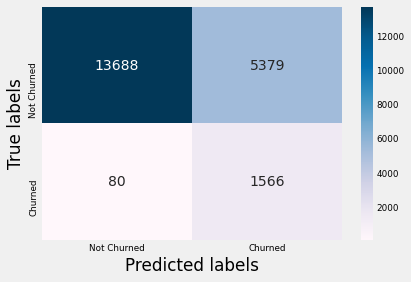

(0.7364, 0.2255, 0.9514, 0.3646, 0.8346)

In [163]:
# Checking the performance of the train dataset
y_train_lgbm = model_lgbm.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_lgbm)

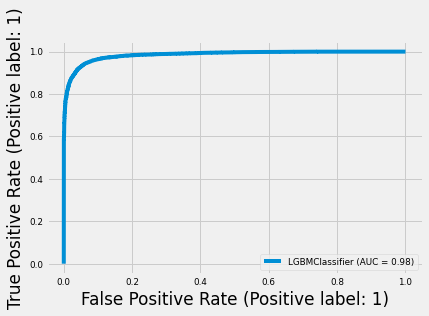

In [164]:
#Checking the AUC ROC Curve
plot_roc_curve(model_lgbm, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      8182
           1       0.21      0.92      0.34       696

    accuracy                           0.72      8878
   macro avg       0.60      0.81      0.58      8878
weighted avg       0.93      0.72      0.79      8878

Accuracy Score   :  0.7236
Precision Score  :  0.2103
Recall Score     :  0.9167
F1 Score         :  0.3421
Area under curve :  0.8119 



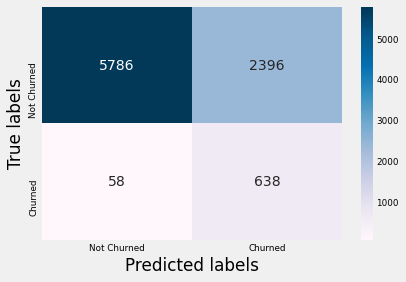

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without...    0.7869     0.2504   
0       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
0  Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
0  Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
0               Logistic Regression with PCA & SMOTE    0.8361     0.3020   
0            Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
0                                  SVM with SMOTEENN    0.8251     0.2921   
0                    Random Forest with class_weight    0.9464     0.7895   
0                        Random Forest with SMOTEENN    0.9102     0.4559   
0  Random Forest with SMOTEENN & Hyperparameter t...    0.8612     0.3412   
0      AdaBoost with SMOTEENN & Hyperparameter tuned    0.8388     0.3073   
0       XGBoost with SMOTEENN & Hyperparameter tuned    0.8601     0.3402   
0     Light GBM with SMOTEENN & Hyperparameter tuned    0.7236     0.2103   

   Recall  F1 score  Area under ROC curve  
0  0.8621    0.3881                0.8213  
0  0.8247    0.4514                0.8346  
0  0.8376    0.4382                0.8344  
0  0.8362    0.4373                0.8335  
0  0.8319    0.4432                0.8342  
0  0.8807    0.3902                0.8284  
0  0.8649    0.4367                0.8433  
0  0.4310    0.5576                0.7106  
0  0.7500    0.5671                0.8369  
0  0.8276    0.4832                0.8458  
0  0.8420    0.4502                0.8403  
0  0.8348    0.4834                0.8485  
0  0.9167    0.3421                0.8119

In [165]:
# Checking the performance on the test dataset
y_test_lgbm = model_lgbm.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_lgbm)

tempResults = pd.DataFrame({'Model':['Light GBM with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            8.Final Model Selection
            </span>   
        </font>    
</h1>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
            As our target is to reduce high value customer churn, it is necessary that we reduce the False Negative and not worry about False Positive. To reduce False Negative we will choose the model which provides highest Recall value. As we are not targeting to reduce False Positives, i.e. customers who are identified as potential churn but will not actually churn, then we will not focus on Precision and F1 Score.   
    </span>    
</div>

In [166]:
# Rearranging the dataframe 
results = results.sort_values("Recall", ascending = False).reset_index(drop=True)
results

Model  Accuracy  Precision  \
0      Light GBM with SMOTEENN & Hyperparameter tuned    0.7236     0.2103   
1             Logistic Regression with PCA & SMOTEENN    0.7842     0.2506   
2                                   SVM with SMOTEENN    0.8251     0.2921   
3   Logistic Regression on imbalanced data without...    0.7869     0.2504   
4       AdaBoost with SMOTEENN & Hyperparameter tuned    0.8388     0.3073   
5   Logistic Regression with PCA & Random over sam...    0.8316     0.2967   
6   Logistic Regression with PCA & Random under sa...    0.8313     0.2960   
7        XGBoost with SMOTEENN & Hyperparameter tuned    0.8601     0.3402   
8                Logistic Regression with PCA & SMOTE    0.8361     0.3020   
9   Random Forest with SMOTEENN & Hyperparameter t...    0.8612     0.3412   
10       Logistic Regression with SMOTE & without PCA    0.8429     0.3108   
11                        Random Forest with SMOTEENN    0.9102     0.4559   
12                    Random Forest with class_weight    0.9464     0.7895   

    Recall  F1 score  Area under ROC curve  
0   0.9167    0.3421                0.8119  
1   0.8807    0.3902                0.8284  
2   0.8649    0.4367                0.8433  
3   0.8621    0.3881                0.8213  
4   0.8420    0.4502                0.8403  
5   0.8376    0.4382                0.8344  
6   0.8362    0.4373                0.8335  
7   0.8348    0.4834                0.8485  
8   0.8319    0.4432                0.8342  
9   0.8276    0.4832                0.8458  
10  0.8247    0.4514                0.8346  
11  0.7500    0.5671                0.8369  
12  0.4310    0.5576                0.7106

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            We have many high performance models which is providing satisfactory Recall value of the test dataset. Amongst them following models gave best results:<br>
        <ul>
            <li> Light GBM with SMOTEENN and Hyperparameter tuning</li>
            <li> Logistic Regression with PCA & SMOTEENN </li>
            <li> Logistic Regression with PCA, SMOTEENN & L2 Regularization </li> 
            <li> SVM with SMOTEENN </li> 
        </ul>
        As Logistic Regression models are with PCA, we loose the interpretability of the features which impacts most in customer churn decision. We will use <b>Light GBM with SMOTEENN</b> as out final model to find feature importance. 
    </span>    
</div>

<h6> Feature Importance </h6>

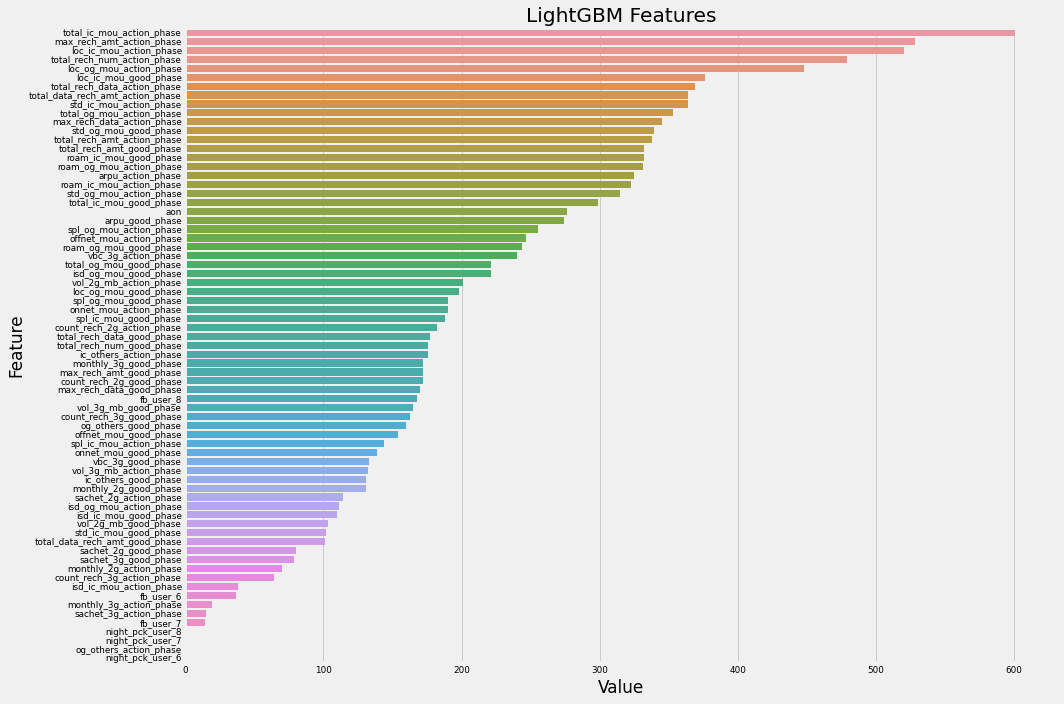

In [167]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [168]:
# Top 20 features : 
feature_imp=feature_imp.sort_values("Value",ascending = False)
feature_imp.head(20)

Value                           Feature
70    601         total_ic_mou_action_phase
69    528         max_rech_amt_action_phase
68    520           loc_ic_mou_action_phase
67    479       total_rech_num_action_phase
66    448           loc_og_mou_action_phase
65    376             loc_ic_mou_good_phase
64    369      total_rech_data_action_phase
63    364  total_data_rech_amt_action_phase
62    364           std_ic_mou_action_phase
61    353         total_og_mou_action_phase
60    345        max_rech_data_action_phase
59    339             std_og_mou_good_phase
58    338       total_rech_amt_action_phase
57    332         total_rech_amt_good_phase
56    332            roam_ic_mou_good_phase
55    331          roam_og_mou_action_phase
54    325                 arpu_action_phase
53    323          roam_ic_mou_action_phase
52    315           std_og_mou_action_phase
51    299           total_ic_mou_good_phase

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
            From the above plots we can see that top 10 importance features are based on action phase mostly (9 out of 10). Top impacting features are total incoming minute, maximum recharge amount, total local,std incoming minute, total & local outgoing minutes, total recharge amount for data  etc for the action phase or month 8.
    </span>    
</div>

<h4>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Business Recommendation
            </span>   
        </font>    
</h4>

<div>
    <span style='font-family:Georgia'>
    Based on top 20 features , 14 out of 20 features are from action phase, where as rest 6 features are from good phase. We can propose following business decisision which will help retain the high value customer who may be planning to leave : <br>
        <ul>
            <li><b><font color = 'blue'> Incoming Calls : </font></b> Total incoming minutes, local & std incoming minutes are in top 10 features. It shows that more incoming calls have high impact on retaining the customer. Incoming calls (local & std) should be made free for all customer </li>
            <li><b><font color = 'blue'> Total Recharge Number : </font></b> Total Recharge Number (total_rech_num) is 4th highest coefficient. It shows that customers with high frequency of recharge numbers tends to stay. The company should launch small value top-up option for calls. Many times customer may hesitate to top up (prepaid option) with higher value amount. For these customer retention, small value top-up will be ideal. The similar logic is applicable for Total Recharge Number for data (total_rech_data) which has the 6th largest coefficient. Similar small top-up values for data might be useful. Also a combination of calling & data which is cost efficient might attract customers to stay with the telecom company </li>
            <li><b><font color = 'blue'> Outgoing Calls : </font></b> Local, STD and Total outgoing call minutes are among the top 20 feature. It shows that higher the outgoing calls, the better chances of the customer to stay with the telecom company. To ensure that, telecom company should launch various discounted offer on outgoing calls. Lower price/minute or free outgoing calls to same telecom company provided connections will also benefit in retaining customer group. </li>
            <li><b><font color = 'blue'> Roaming : </font></b> Incoming and Outgoing calls during roaming are critical factor as these are part of top 20 coefficients. Incoming call roaming charges should be made free within the country. STD outgoing call should be same and shouldn't attract extra cost if the roaming option is within the country. For outside country incoming and outgoing roaming as well as data connection, company should launch special country wise roaming packages valid for 7 days, 15 days, 1 month etc. These benefits will attract customer to stay with the telecom company for longer periof</li>
            <li><b><font color = 'blue'> Total Amount Recharge : </font></b> Total Amount Recharge on calls and data also have high coefficent value. Telecom company should launch discounted price for higher /longer terms (days/month etc) recharge options on calls and data. This may ensure that the customer is ready to available long terms plans which also indicates that the customer may tend to stay longer. </li>
            <li> Introduce more services to the existing customer or informing them and generating more average revenue would lessen their chances to churn out. </li>
        </ul>
        In general, when the above features have a decline trend from the good phase to the action phase, then the customer care executives can reach them out and try to understand if there is any issues. This step would involve an additional smaller cost but this would help to prevent the high value customer to churn out, who generates average revenue per month atleast more than Rs. 240.75. <br>
        If the goal is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as 'not churned,' ( False Positives) as it does not cause any negative problem. It could potentially make them even happier for the extra attention they are getting.
    </span>
</div>